In [7]:
# Library Imports
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import cartopy.crs as ccrs
from netCDF4 import Dataset
import os
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import cartopy.feature
import numpy as np
from math import radians, sin, cos, sqrt, atan2
import xarray as xr


In [8]:
def get_files_within_interval(timestamp_str, minutes):
    # Convert the timestamp string to a datetime object
    
    global timestamp
    timestamp = datetime.strptime(timestamp_str, "%m/%d/%Y %H:%M:%S")

    # Calculate start and end times
    start_time = timestamp - timedelta(minutes=minutes)
    end_time = timestamp + timedelta(minutes=minutes)

    # Convert start_time and end_time into string
    global start_str
    global end_str
    start_str = start_time.strftime("%Y%j%H%M%S")
    end_str = end_time.strftime("%Y%j%H%M%S")

    directory = r"C:\Users\jinge\OneDrive\Documents\Research\Lightning Data"  # replace with your directory path

    # List to store the matched files
    global matched_files
    matched_files = []

    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if 'GLM-L2-LCFA' in filename:
                splits = filename.split("_")
                file_timestamp = splits[3][1:]
                if start_str <= file_timestamp <= end_str:
                    matched_files.append(os.path.join(dirpath, filename))

    print(matched_files)

get_files_within_interval(r"10/10/2021 17:45:00", 15)

['C:\\Users\\jinge\\OneDrive\\Documents\\Research\\Lightning Data\\noaa-goes17\\GLM-L2-LCFA\\2021\\283\\17\\OR_GLM-L2-LCFA_G17_s20212831730000_e20212831730200_c20212831730226.nc', 'C:\\Users\\jinge\\OneDrive\\Documents\\Research\\Lightning Data\\noaa-goes17\\GLM-L2-LCFA\\2021\\283\\17\\OR_GLM-L2-LCFA_G17_s20212831730200_e20212831730400_c20212831730421.nc', 'C:\\Users\\jinge\\OneDrive\\Documents\\Research\\Lightning Data\\noaa-goes17\\GLM-L2-LCFA\\2021\\283\\17\\OR_GLM-L2-LCFA_G17_s20212831730400_e20212831731000_c20212831731027.nc', 'C:\\Users\\jinge\\OneDrive\\Documents\\Research\\Lightning Data\\noaa-goes17\\GLM-L2-LCFA\\2021\\283\\17\\OR_GLM-L2-LCFA_G17_s20212831731000_e20212831731200_c20212831731224.nc', 'C:\\Users\\jinge\\OneDrive\\Documents\\Research\\Lightning Data\\noaa-goes17\\GLM-L2-LCFA\\2021\\283\\17\\OR_GLM-L2-LCFA_G17_s20212831731200_e20212831731400_c20212831731420.nc', 'C:\\Users\\jinge\\OneDrive\\Documents\\Research\\Lightning Data\\noaa-goes17\\GLM-L2-LCFA\\2021\\283\\1

In [9]:
# Reading tornado dataset
tornado_dset = pd.read_csv(r'C:\Users\jinge\Downloads\1950-2022_actual_tornadoes.csv')
use_tornado_dset = tornado_dset[
    (tornado_dset['yr'] >= 2019) &
    (tornado_dset['st'].isin(["OK", "KS", "SD", "NE"])) &
    (tornado_dset['mag'] >= 2)
]
row = 37
use_tornado_dset = use_tornado_dset.reset_index(drop=True)
values = use_tornado_dset.loc[row - 2, ['slat', 'slon', 'elat', 'elon']]
print(values)

slat    35.044
slon   -98.295
elat    35.068
elon   -98.155
Name: 35, dtype: object


In [10]:
# PDF setup
output_dir = r"C:\Users\jinge\OneDrive\Documents"
pdf_file_name = use_tornado_dset.at[row - 2, 'date'].replace("/", "_") + "_" + use_tornado_dset.at[row - 2, 'time'].replace(":", "_") + ".pdf"
output_path = os.path.join(output_dir, pdf_file_name)
pdf_pages = PdfPages(output_path)

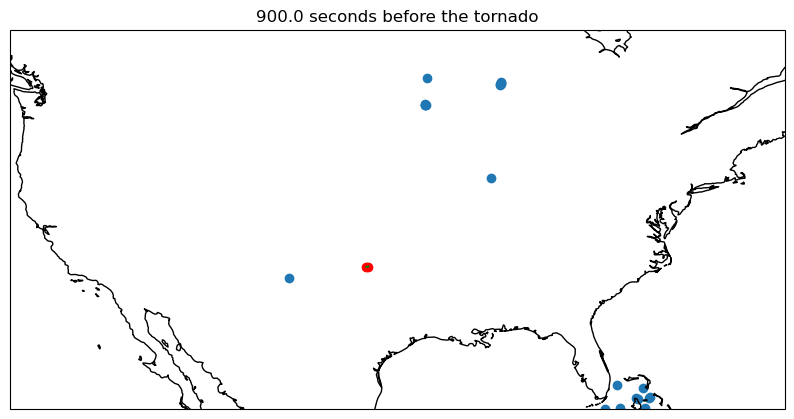

<Figure size 640x480 with 0 Axes>

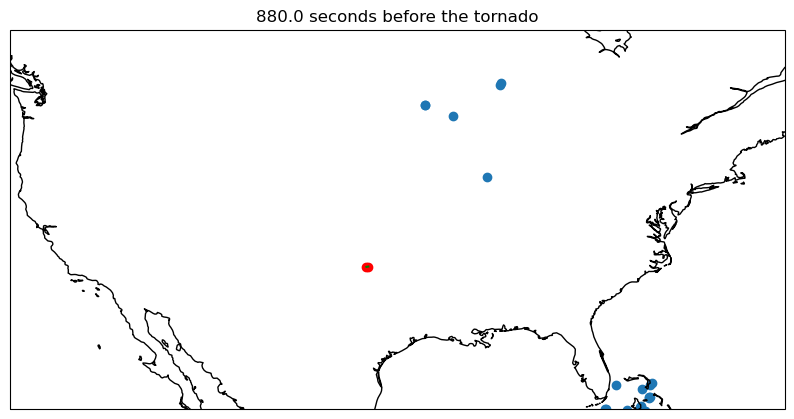

<Figure size 640x480 with 0 Axes>

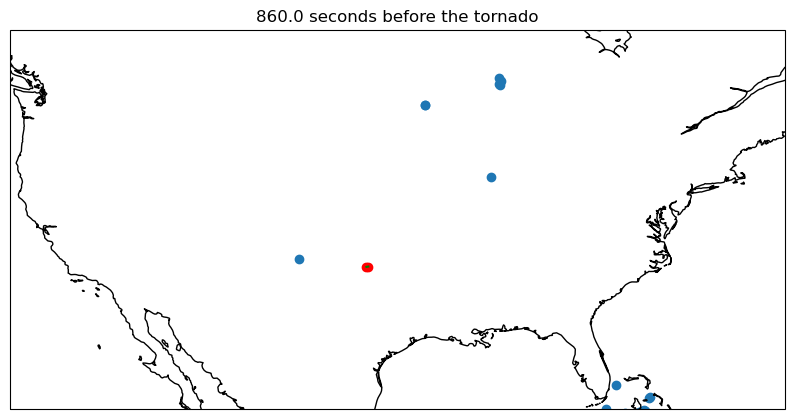

<Figure size 640x480 with 0 Axes>

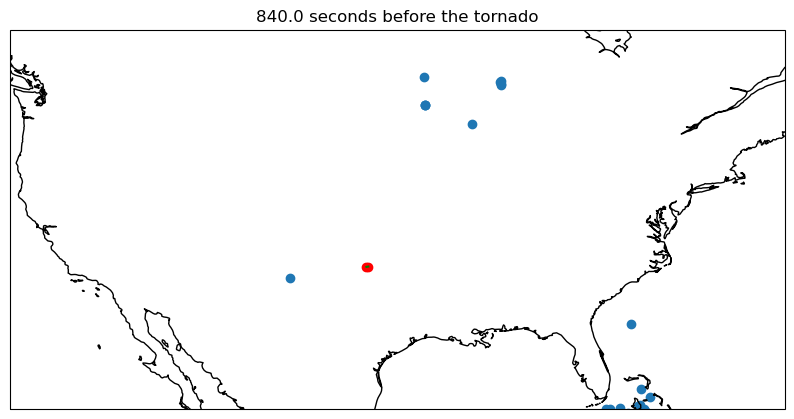

<Figure size 640x480 with 0 Axes>

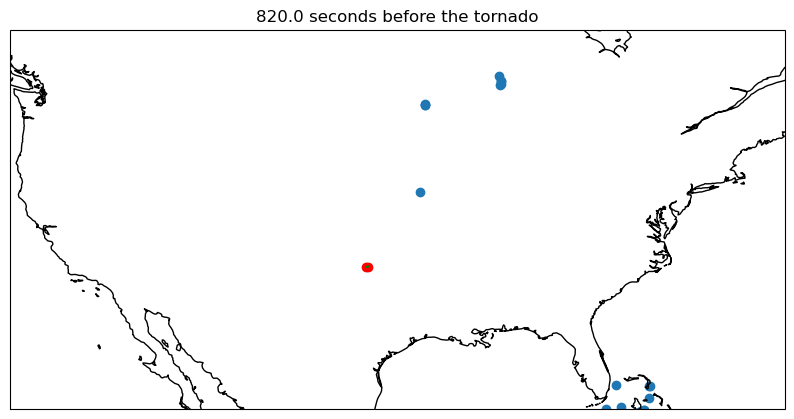

<Figure size 640x480 with 0 Axes>

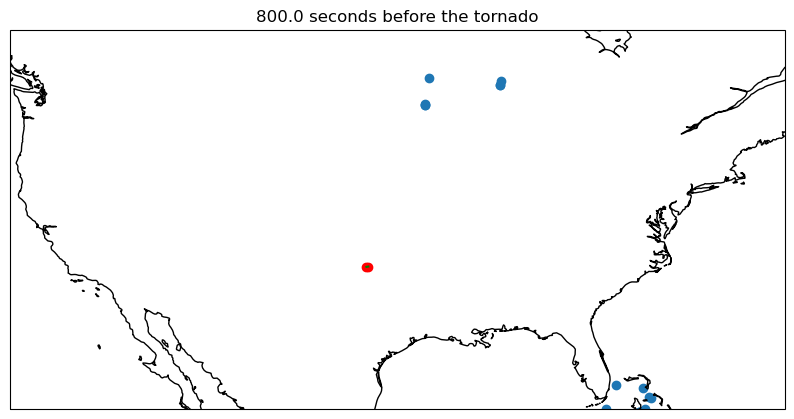

<Figure size 640x480 with 0 Axes>

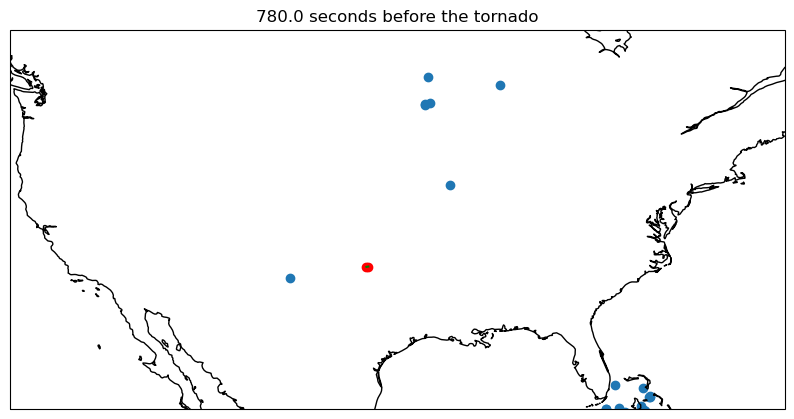

<Figure size 640x480 with 0 Axes>

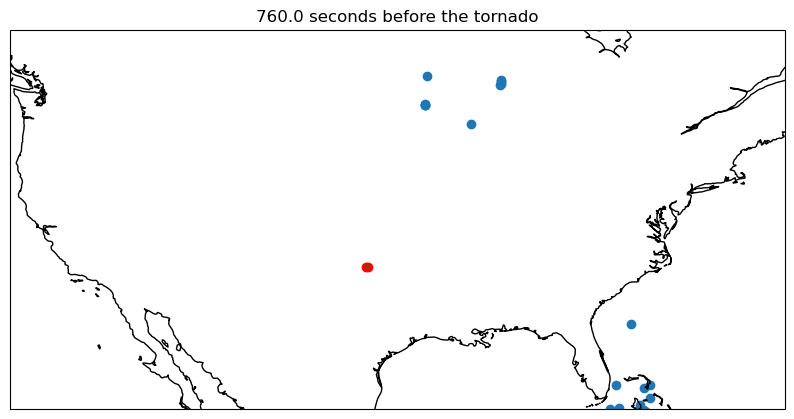

<Figure size 640x480 with 0 Axes>

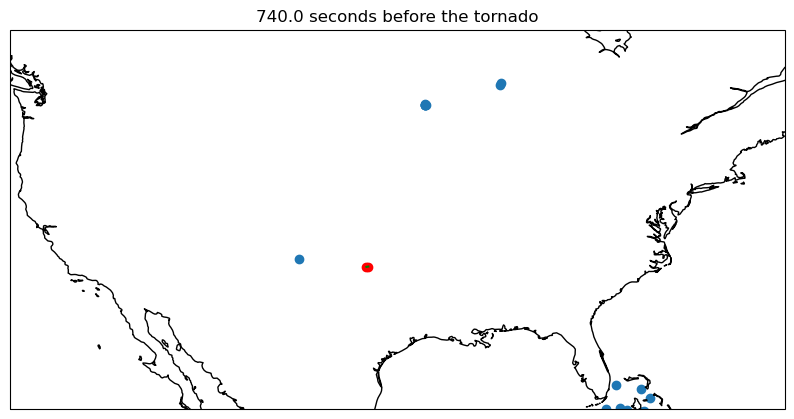

<Figure size 640x480 with 0 Axes>

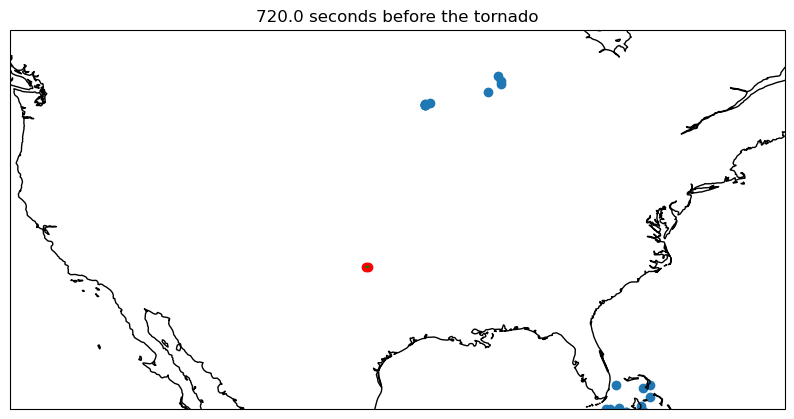

<Figure size 640x480 with 0 Axes>

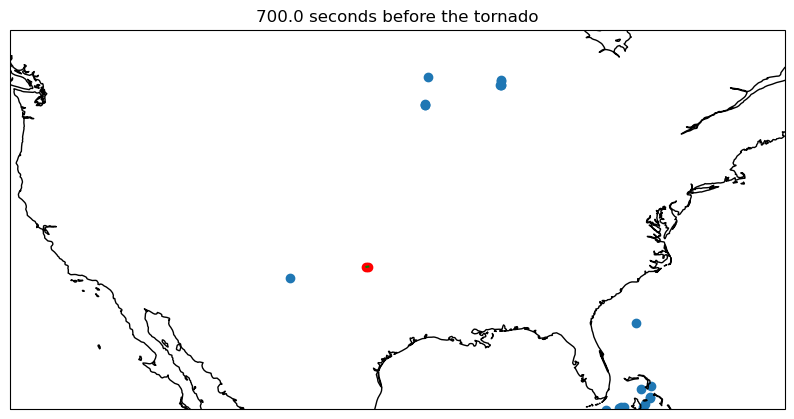

<Figure size 640x480 with 0 Axes>

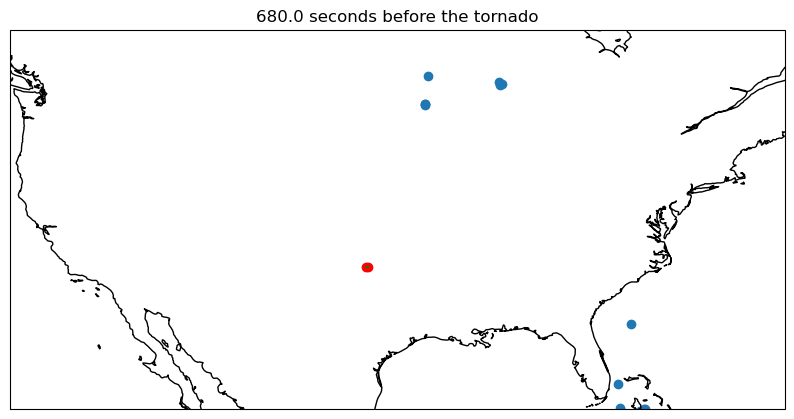

<Figure size 640x480 with 0 Axes>

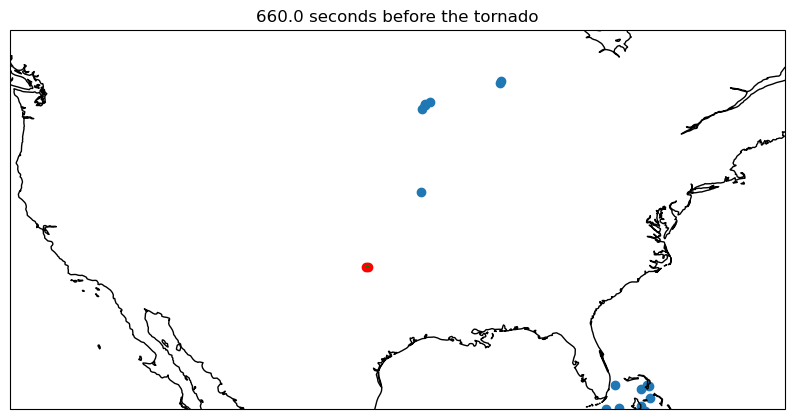

<Figure size 640x480 with 0 Axes>

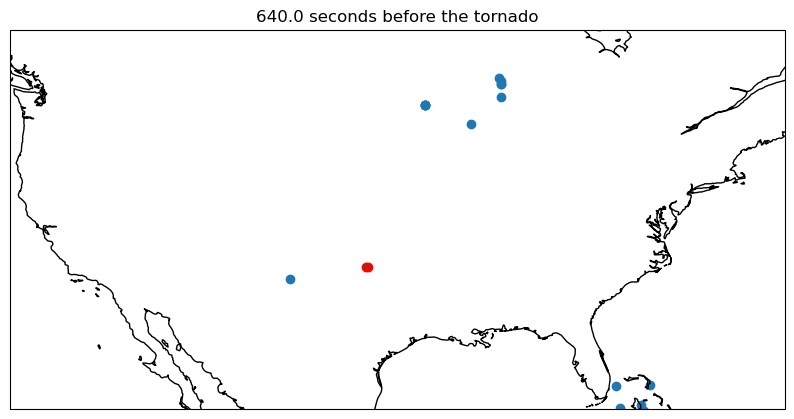

<Figure size 640x480 with 0 Axes>

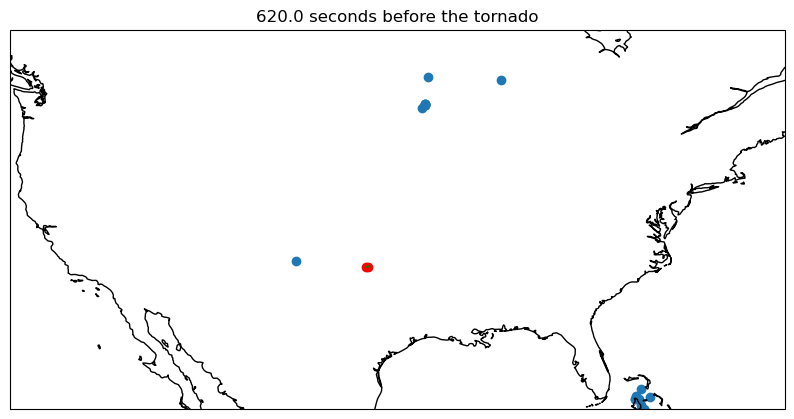

<Figure size 640x480 with 0 Axes>

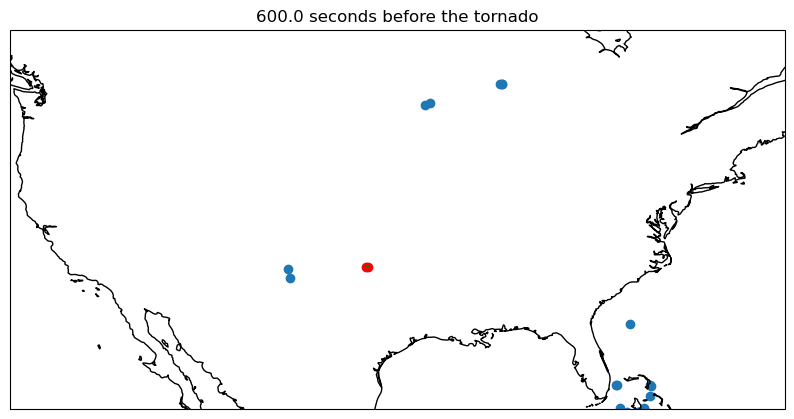

<Figure size 640x480 with 0 Axes>

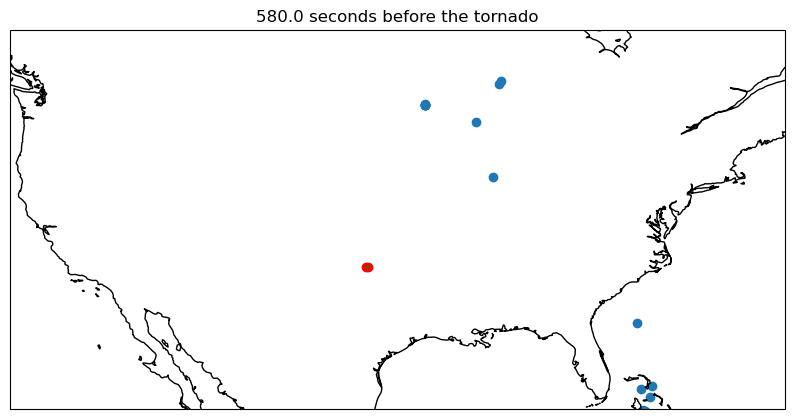

<Figure size 640x480 with 0 Axes>

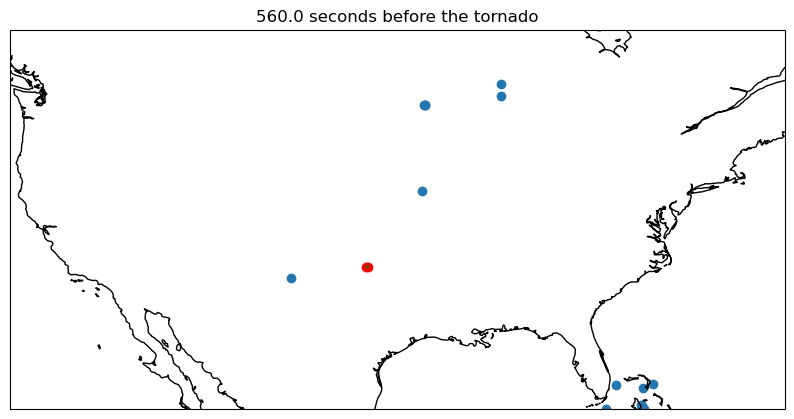

<Figure size 640x480 with 0 Axes>

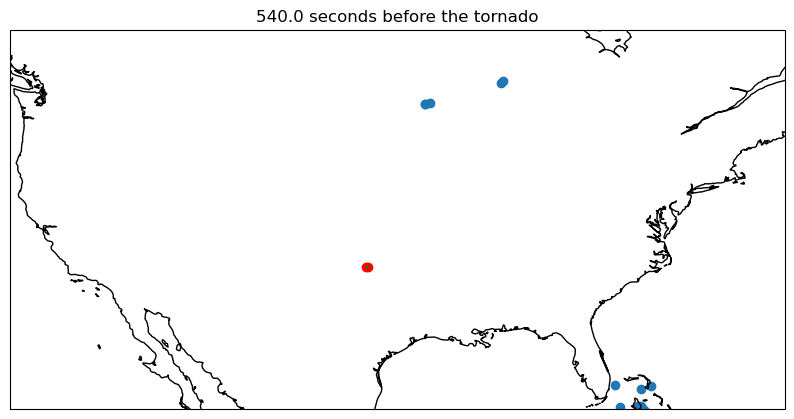

<Figure size 640x480 with 0 Axes>

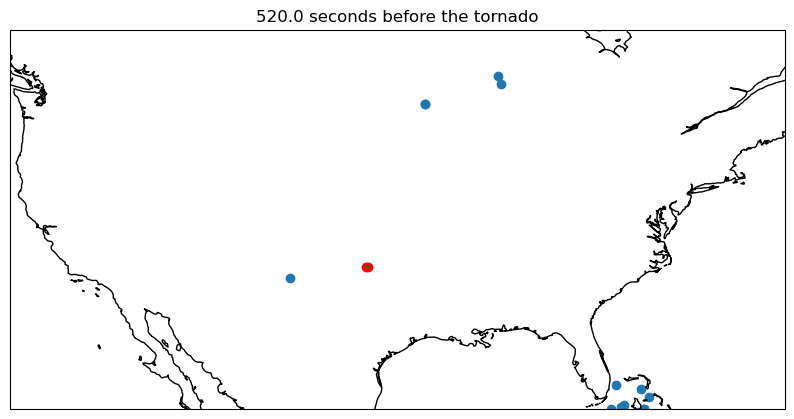

<Figure size 640x480 with 0 Axes>

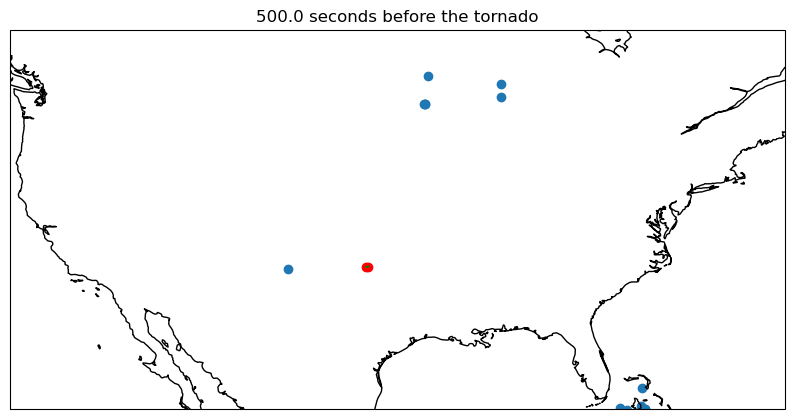

<Figure size 640x480 with 0 Axes>

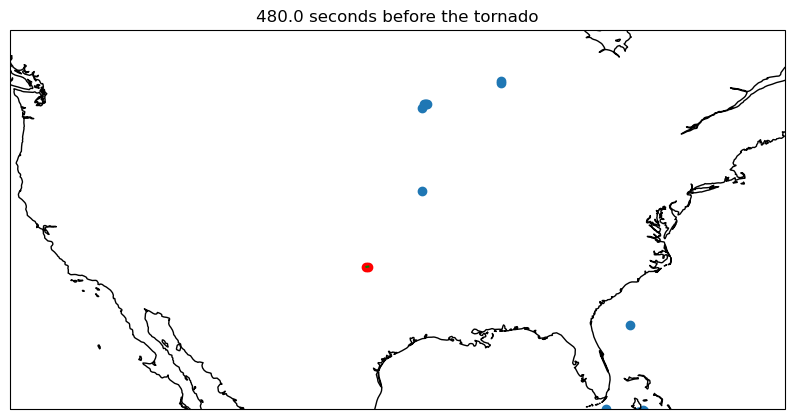

<Figure size 640x480 with 0 Axes>

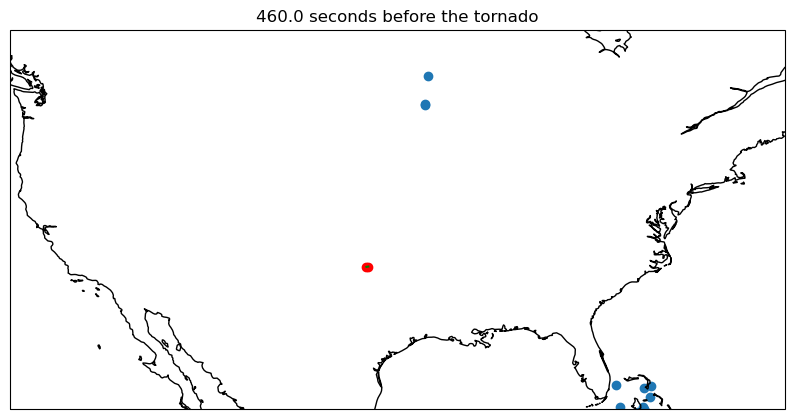

<Figure size 640x480 with 0 Axes>

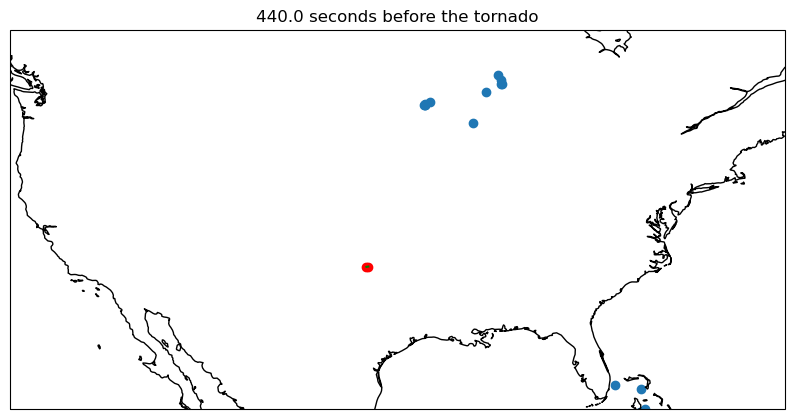

<Figure size 640x480 with 0 Axes>

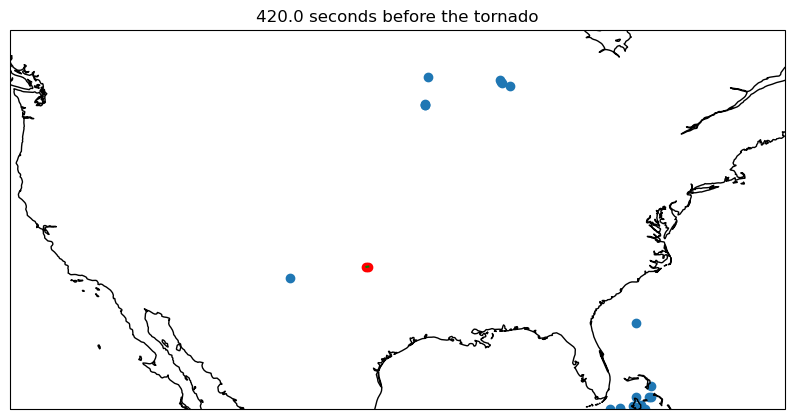

<Figure size 640x480 with 0 Axes>

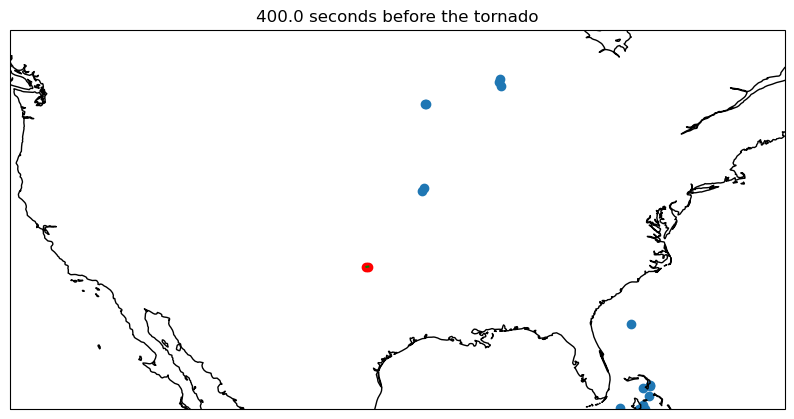

<Figure size 640x480 with 0 Axes>

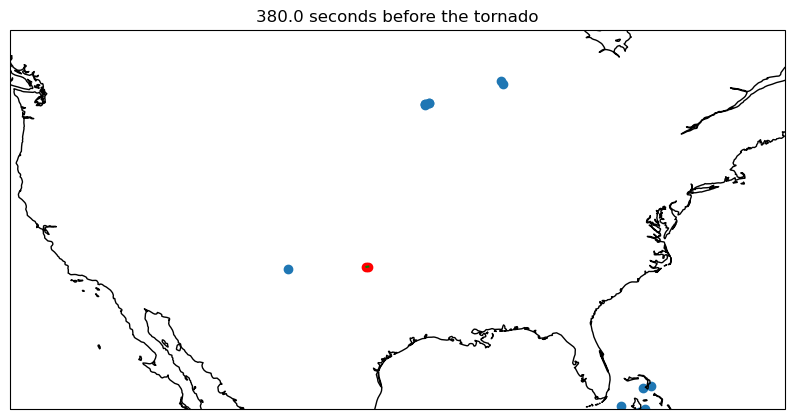

<Figure size 640x480 with 0 Axes>

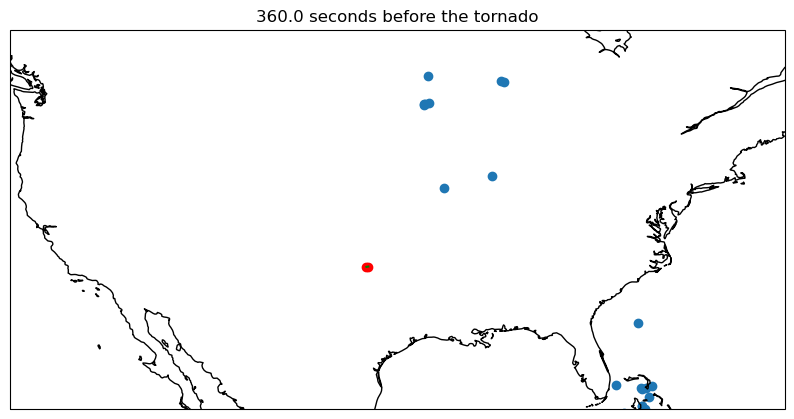

<Figure size 640x480 with 0 Axes>

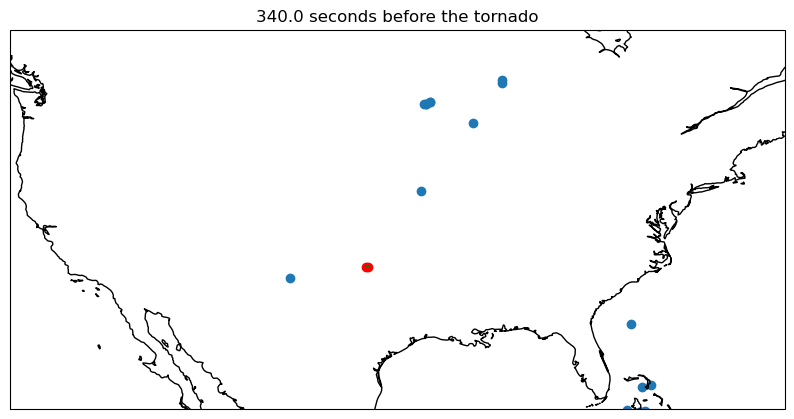

<Figure size 640x480 with 0 Axes>

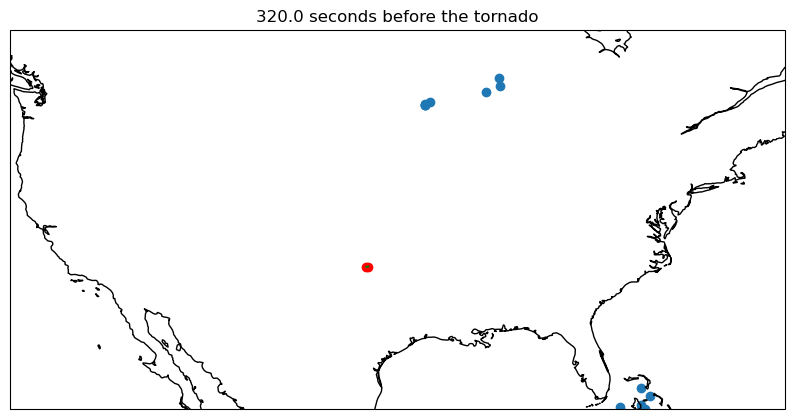

<Figure size 640x480 with 0 Axes>

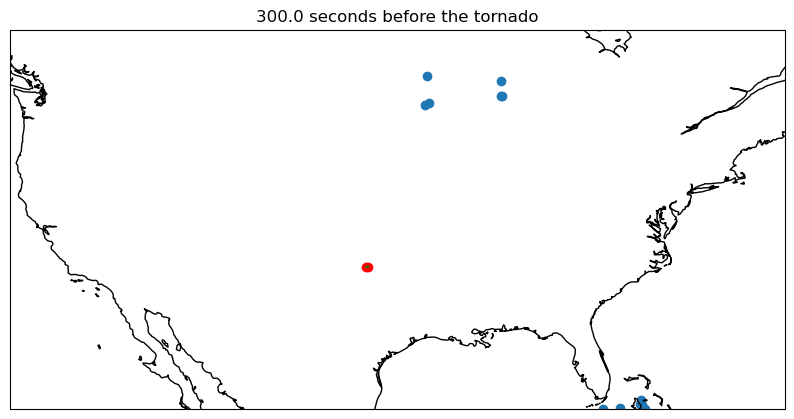

<Figure size 640x480 with 0 Axes>

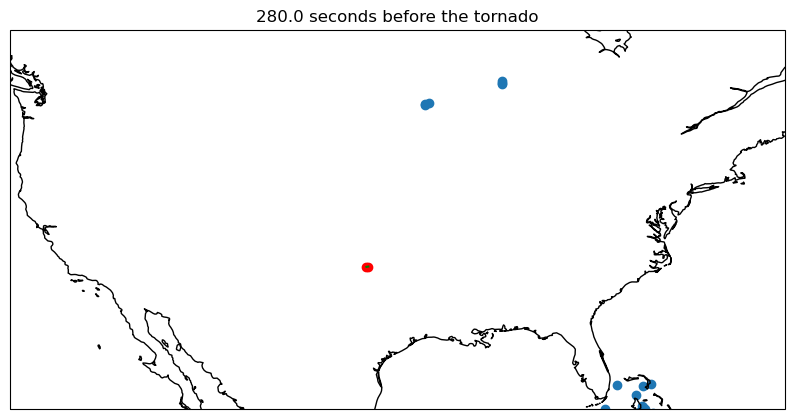

<Figure size 640x480 with 0 Axes>

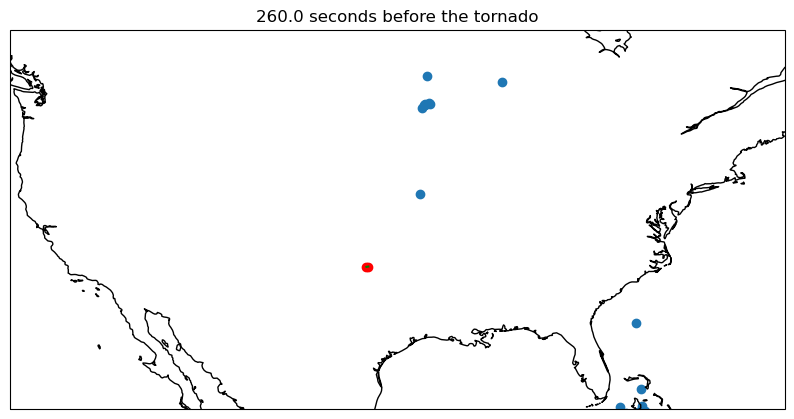

<Figure size 640x480 with 0 Axes>

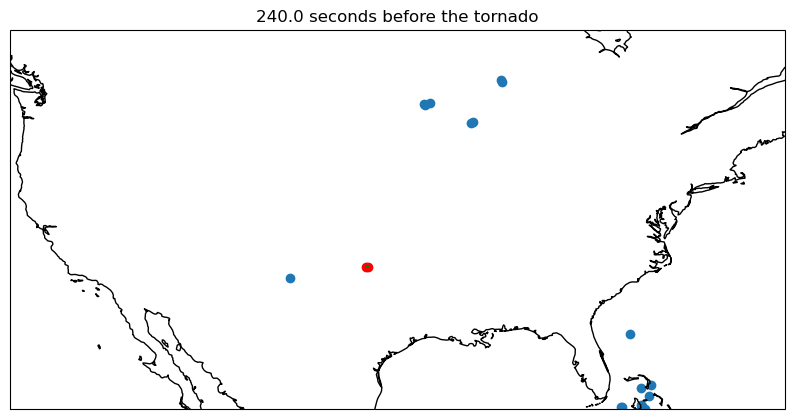

<Figure size 640x480 with 0 Axes>

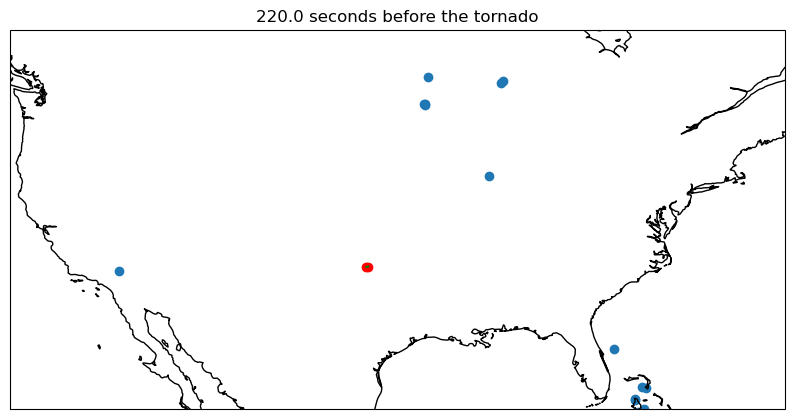

<Figure size 640x480 with 0 Axes>

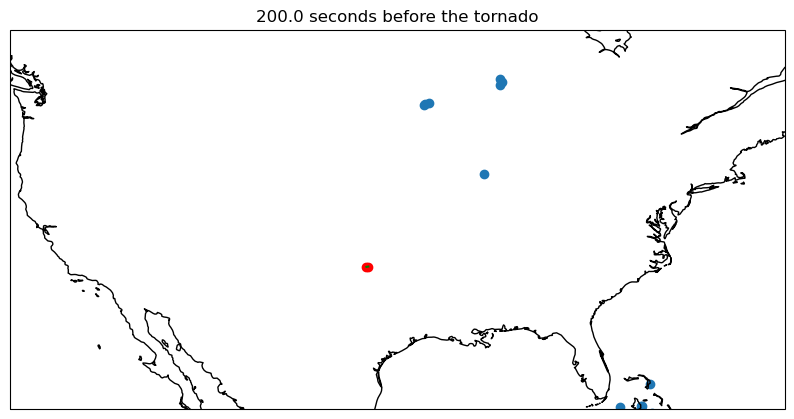

<Figure size 640x480 with 0 Axes>

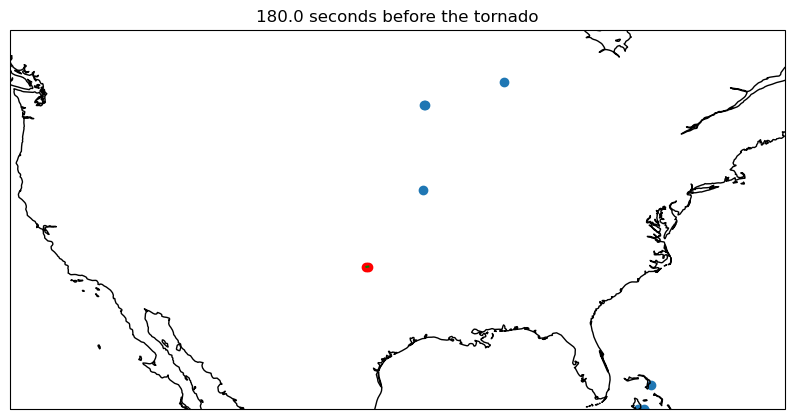

<Figure size 640x480 with 0 Axes>

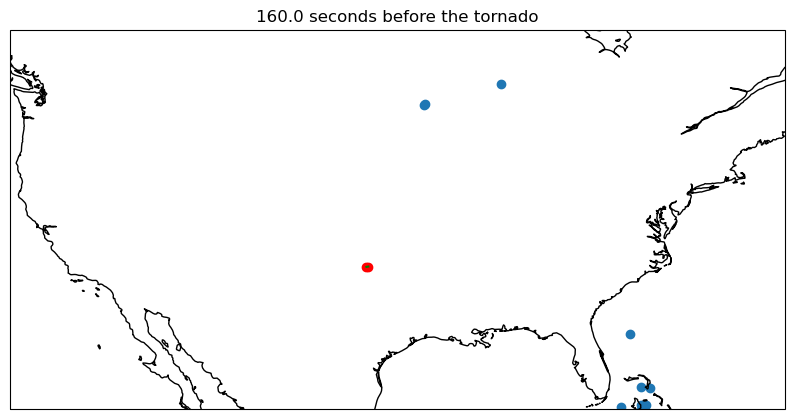

<Figure size 640x480 with 0 Axes>

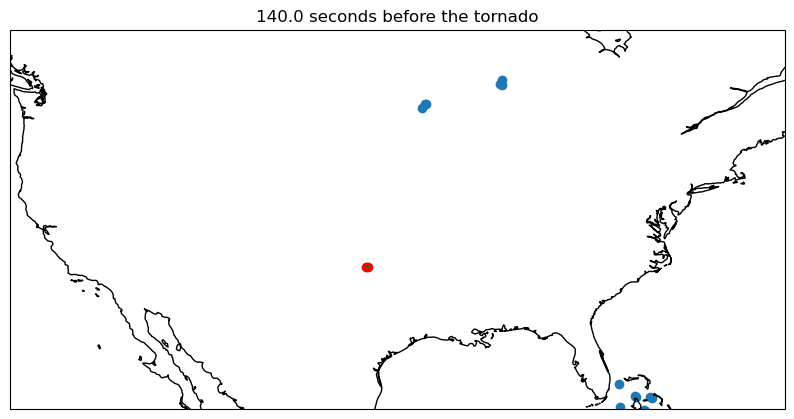

<Figure size 640x480 with 0 Axes>

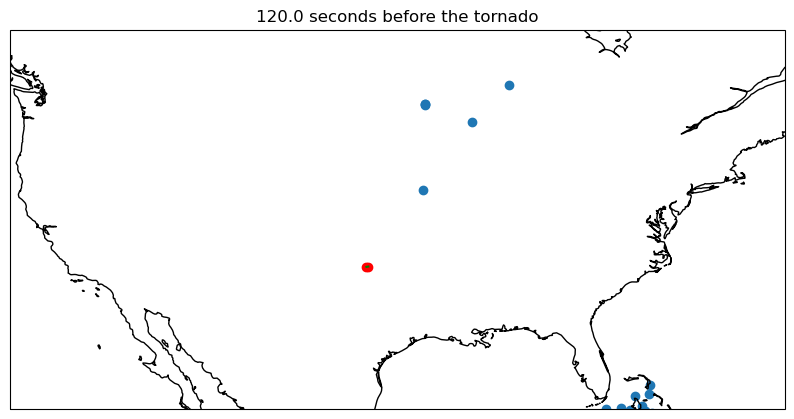

<Figure size 640x480 with 0 Axes>

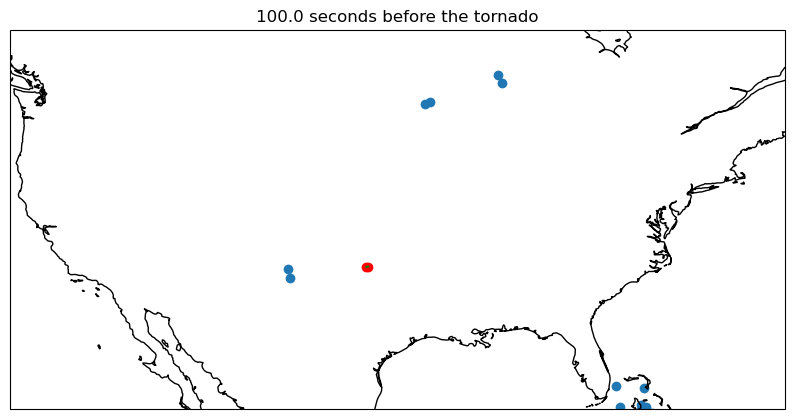

<Figure size 640x480 with 0 Axes>

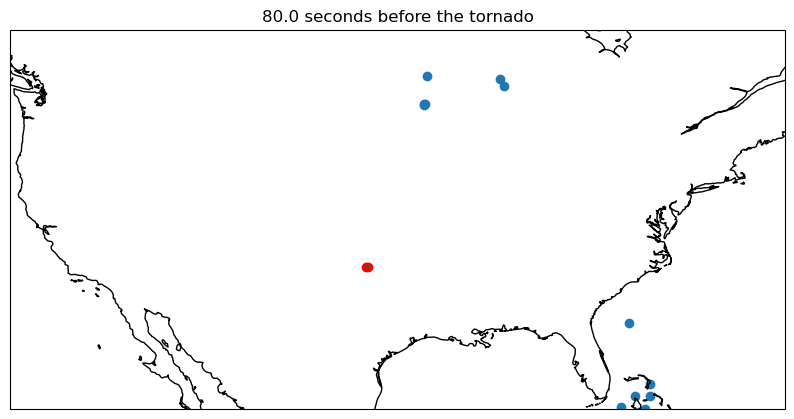

<Figure size 640x480 with 0 Axes>

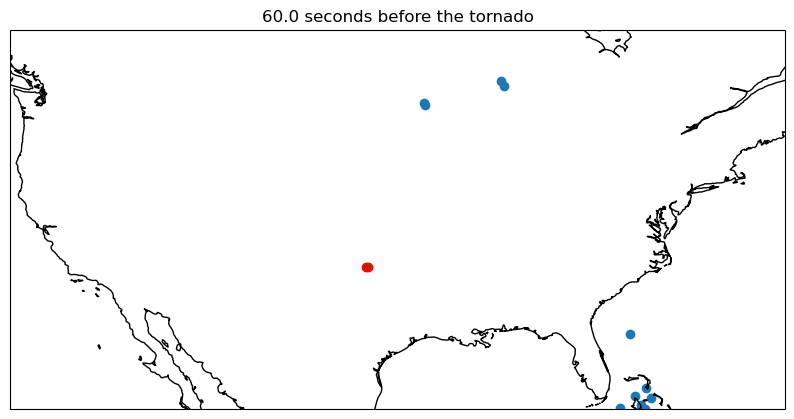

<Figure size 640x480 with 0 Axes>

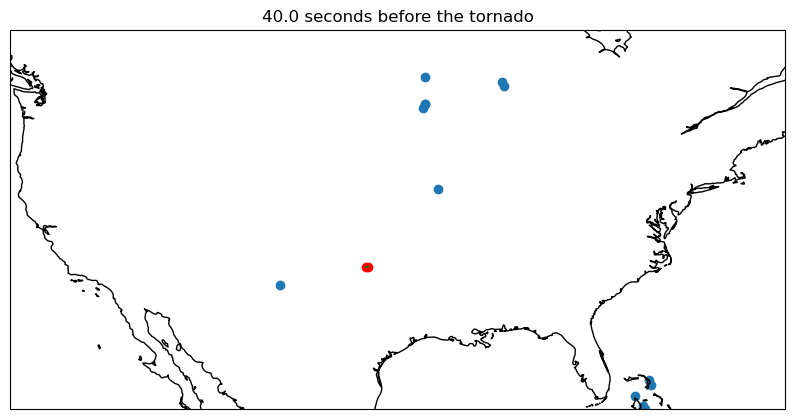

<Figure size 640x480 with 0 Axes>

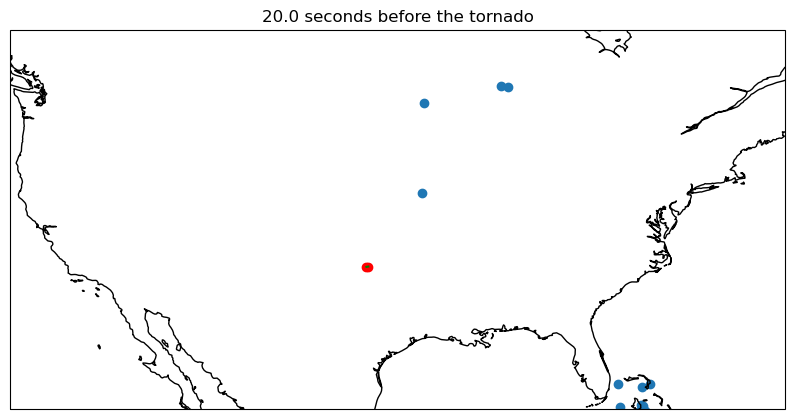

<Figure size 640x480 with 0 Axes>

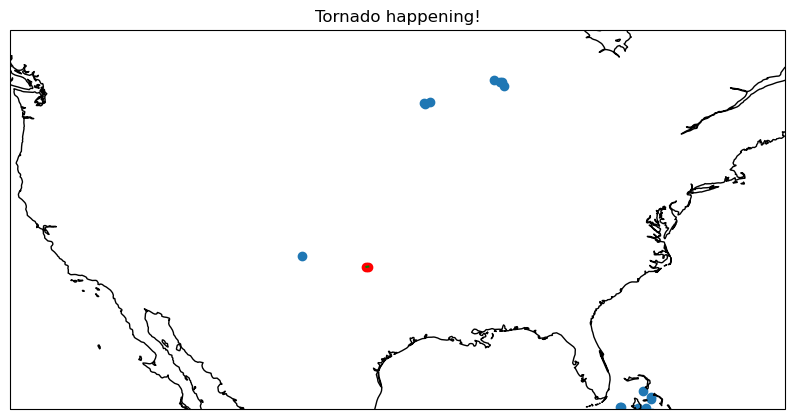

<Figure size 640x480 with 0 Axes>

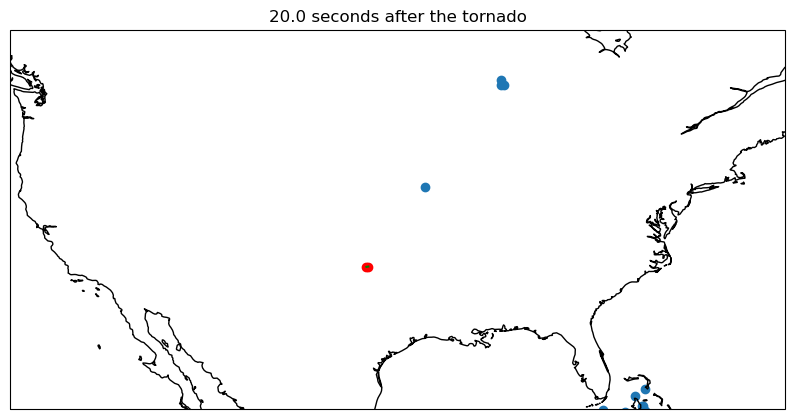

<Figure size 640x480 with 0 Axes>

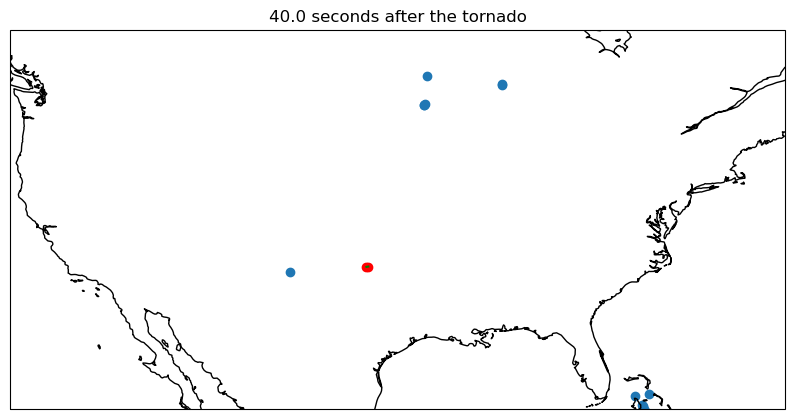

<Figure size 640x480 with 0 Axes>

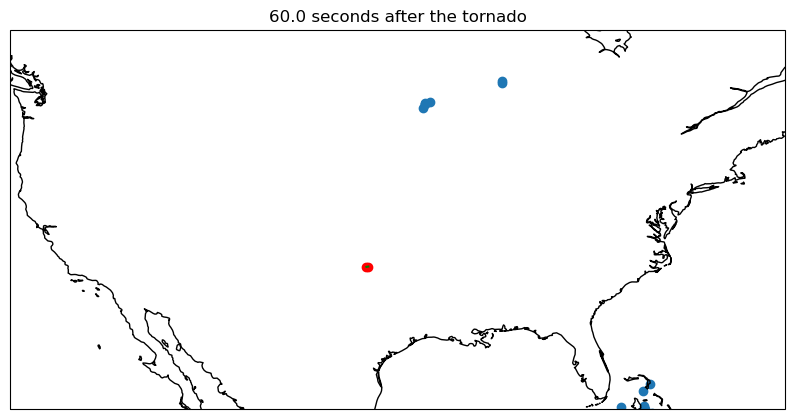

<Figure size 640x480 with 0 Axes>

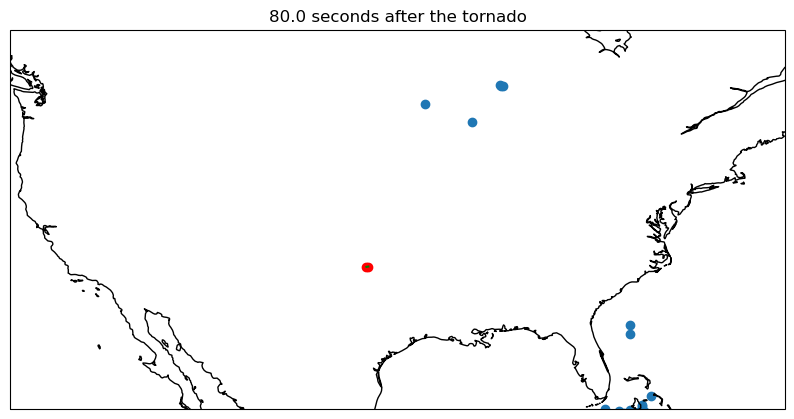

<Figure size 640x480 with 0 Axes>

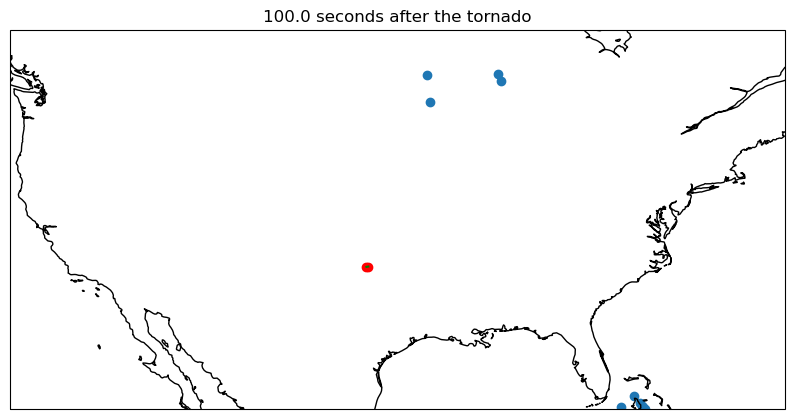

<Figure size 640x480 with 0 Axes>

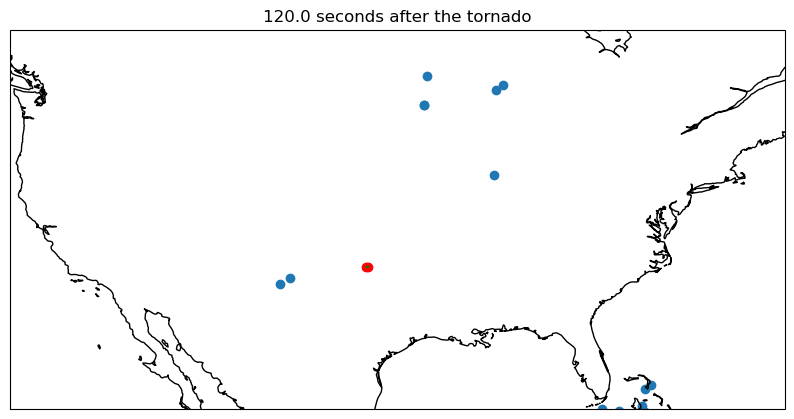

<Figure size 640x480 with 0 Axes>

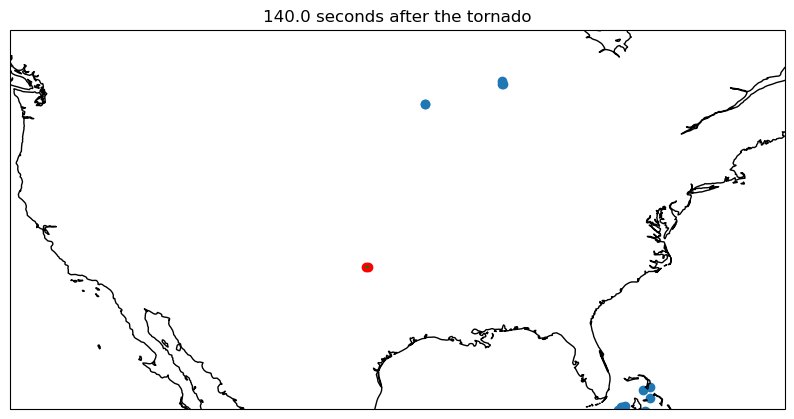

<Figure size 640x480 with 0 Axes>

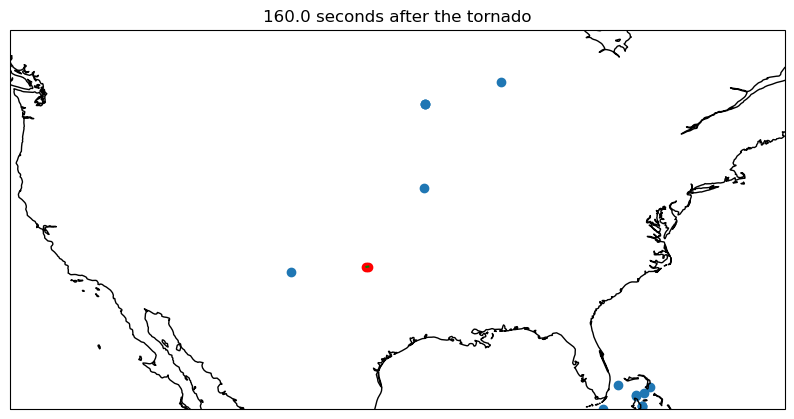

<Figure size 640x480 with 0 Axes>

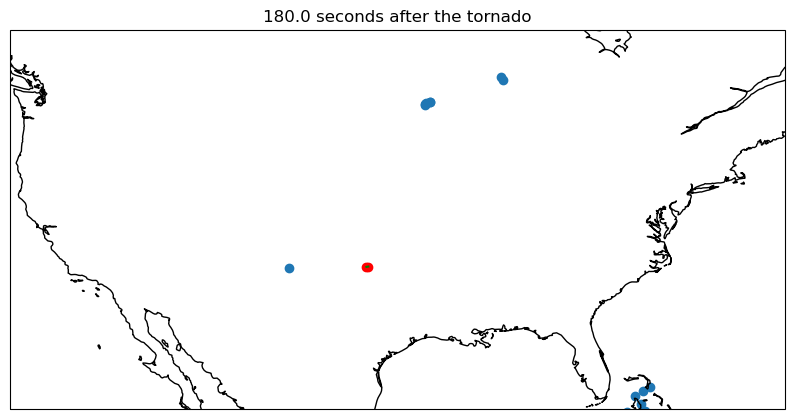

<Figure size 640x480 with 0 Axes>

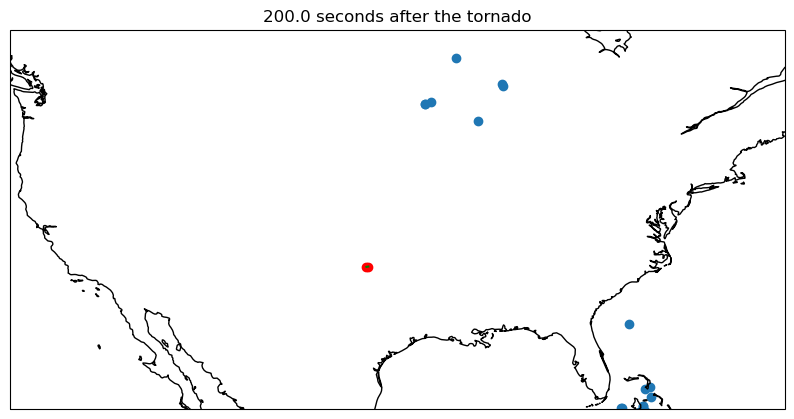

<Figure size 640x480 with 0 Axes>

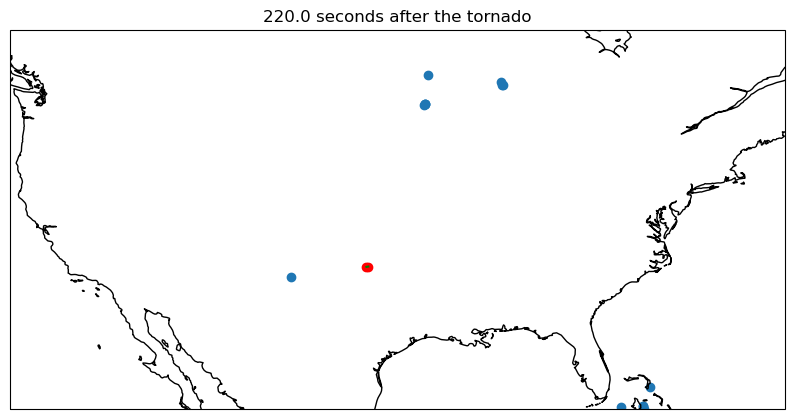

<Figure size 640x480 with 0 Axes>

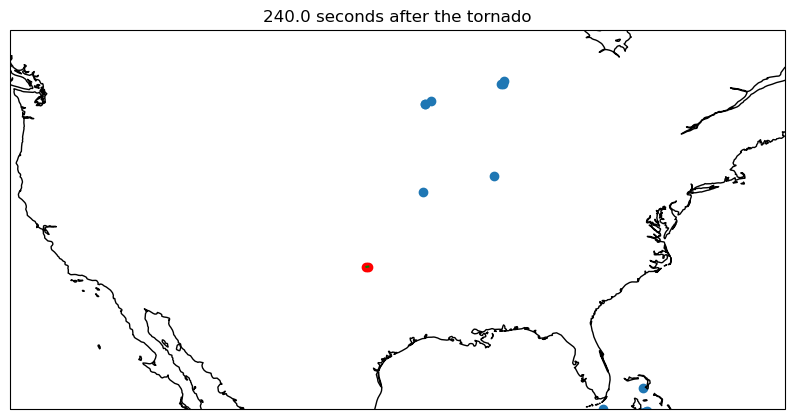

<Figure size 640x480 with 0 Axes>

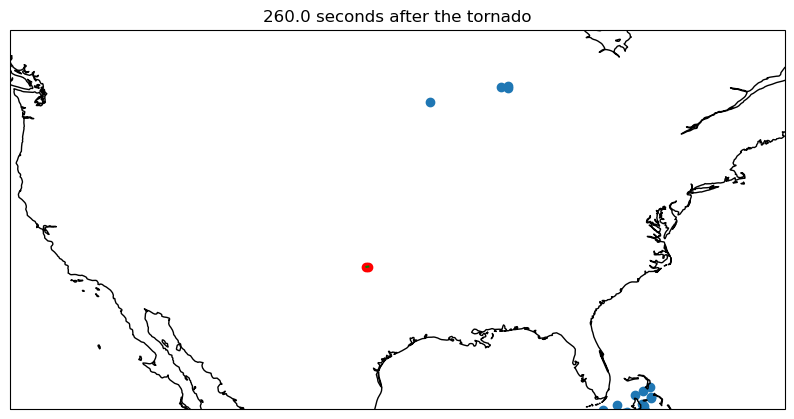

<Figure size 640x480 with 0 Axes>

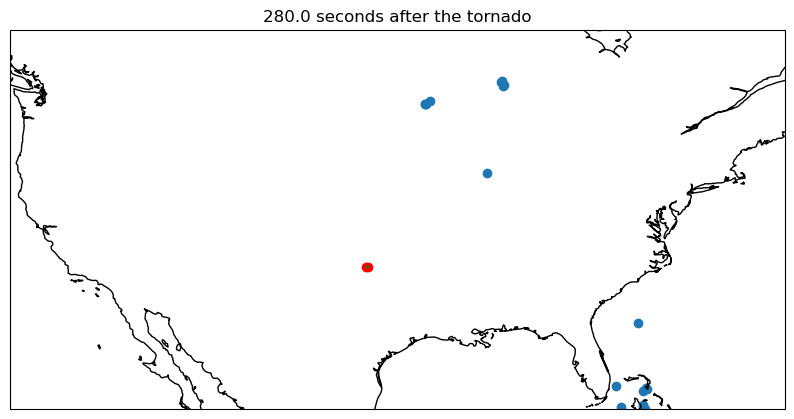

<Figure size 640x480 with 0 Axes>

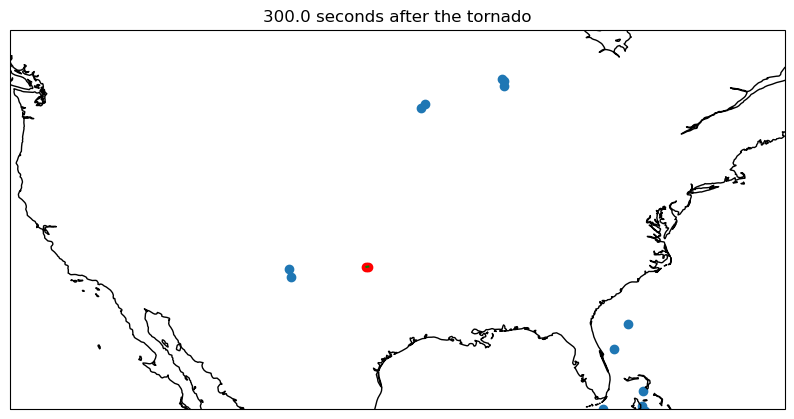

<Figure size 640x480 with 0 Axes>

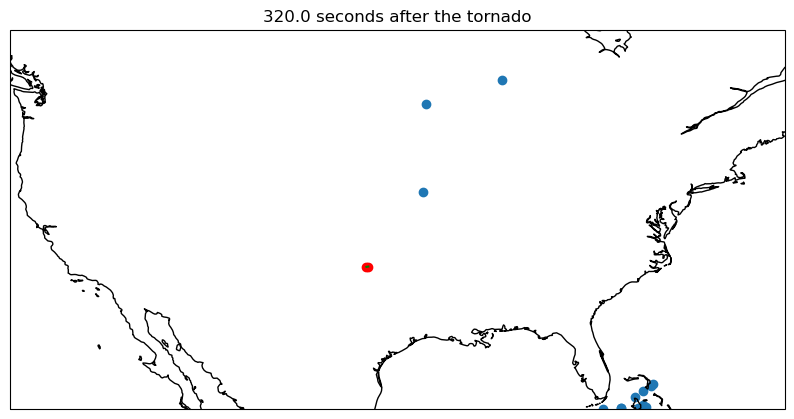

<Figure size 640x480 with 0 Axes>

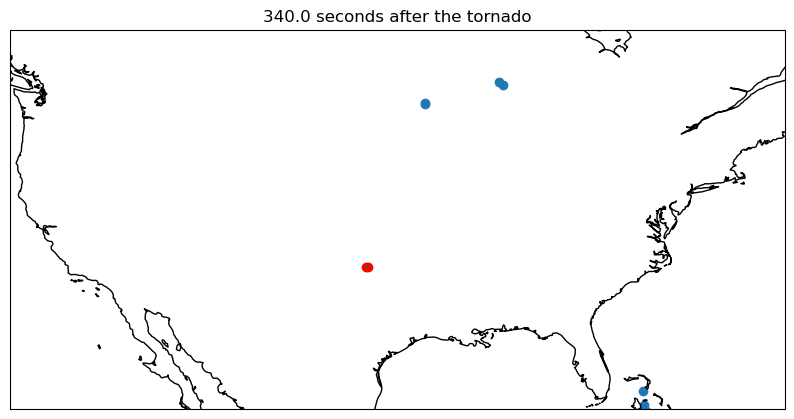

<Figure size 640x480 with 0 Axes>

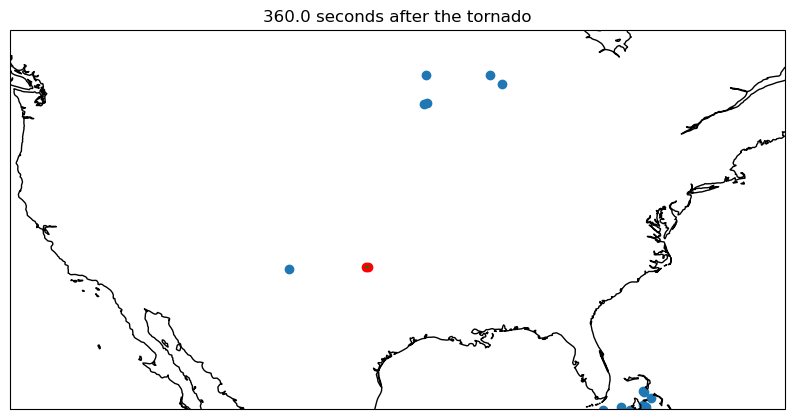

<Figure size 640x480 with 0 Axes>

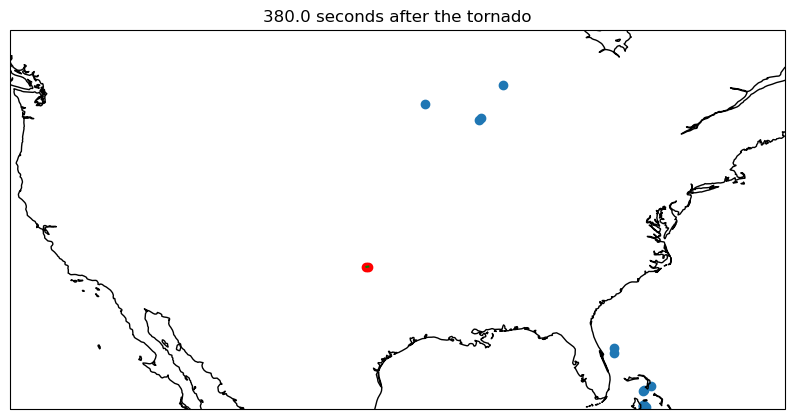

<Figure size 640x480 with 0 Axes>

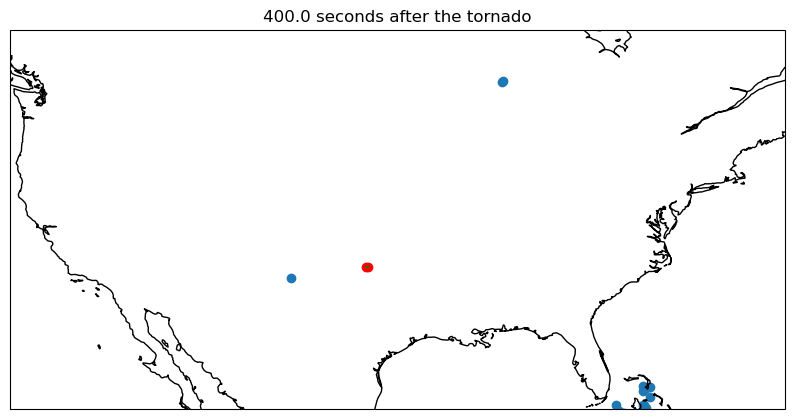

<Figure size 640x480 with 0 Axes>

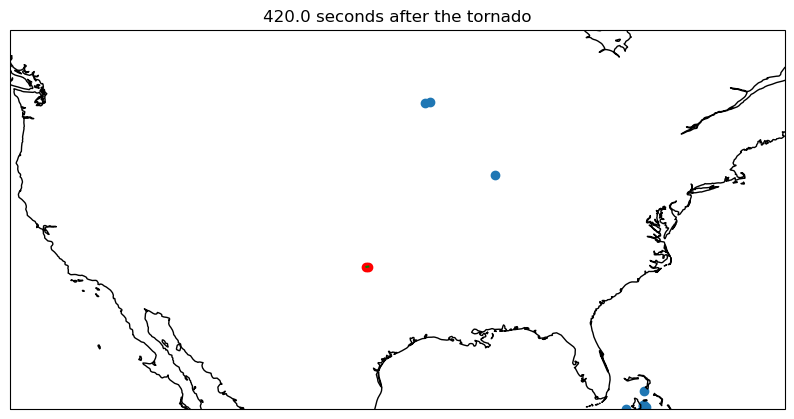

<Figure size 640x480 with 0 Axes>

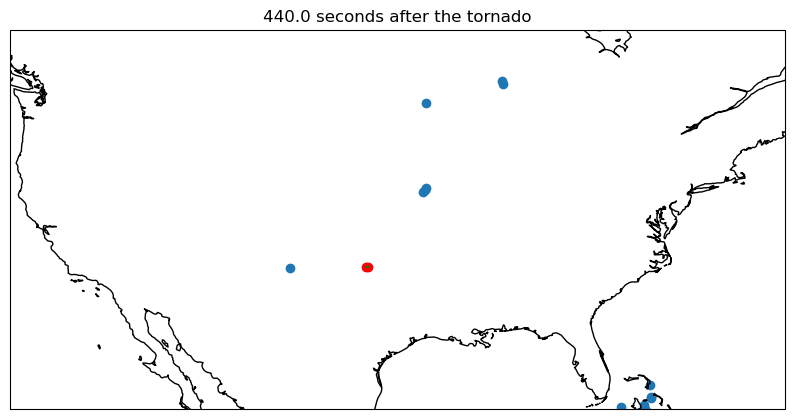

<Figure size 640x480 with 0 Axes>

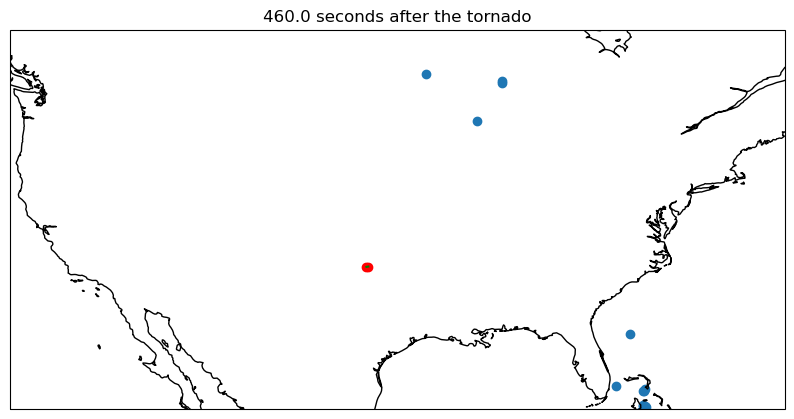

<Figure size 640x480 with 0 Axes>

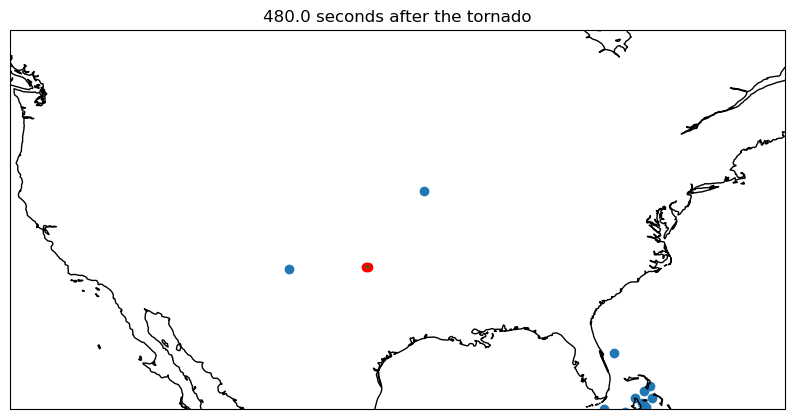

<Figure size 640x480 with 0 Axes>

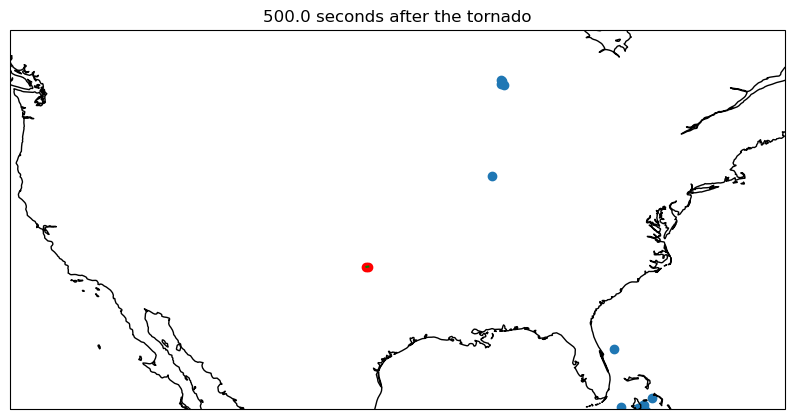

<Figure size 640x480 with 0 Axes>

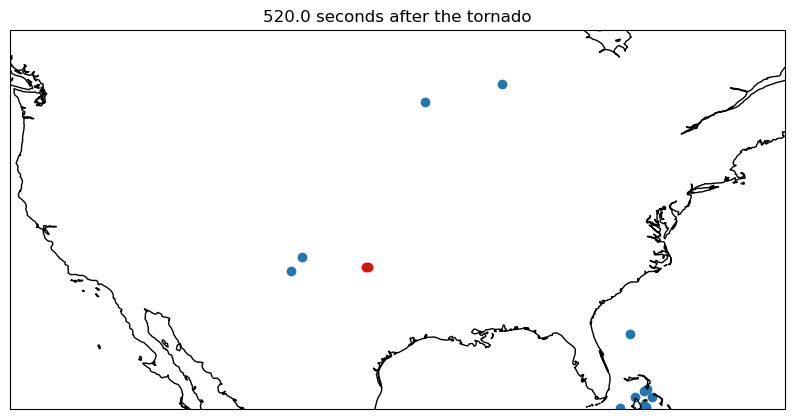

<Figure size 640x480 with 0 Axes>

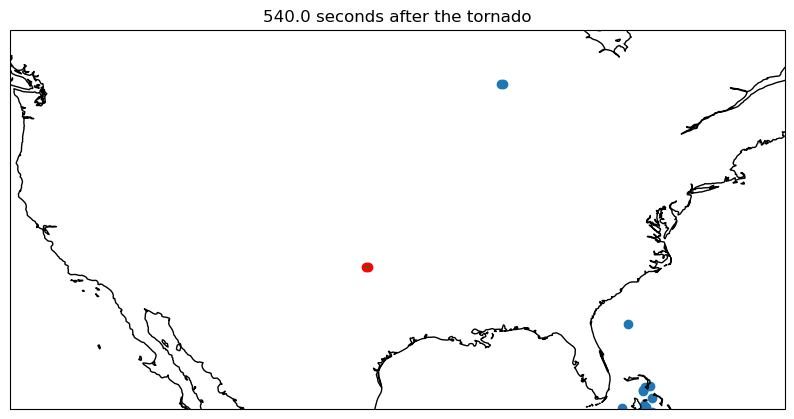

<Figure size 640x480 with 0 Axes>

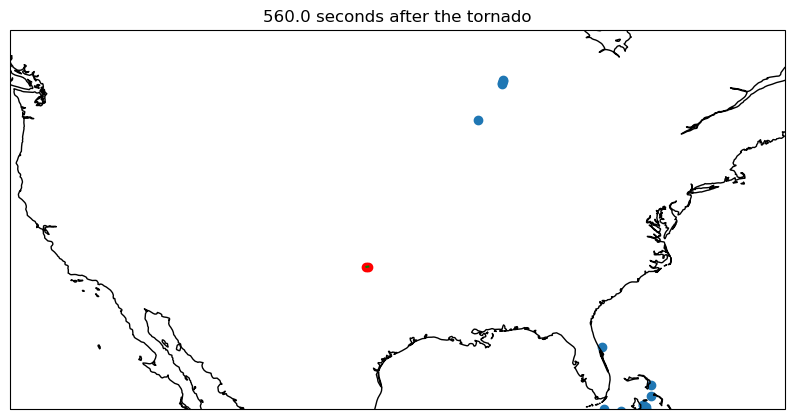

<Figure size 640x480 with 0 Axes>

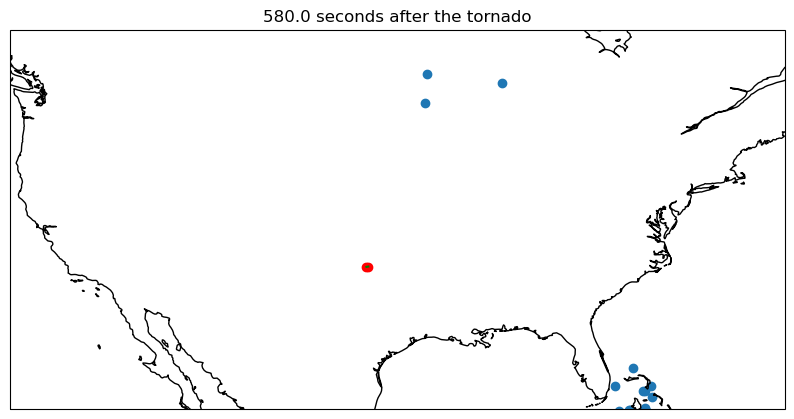

<Figure size 640x480 with 0 Axes>

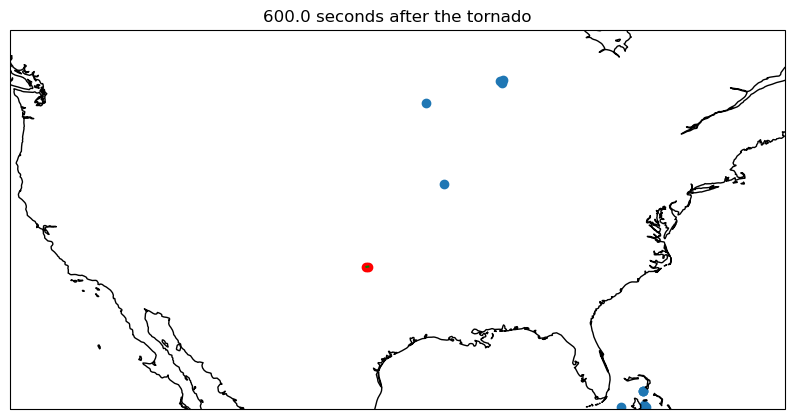

<Figure size 640x480 with 0 Axes>

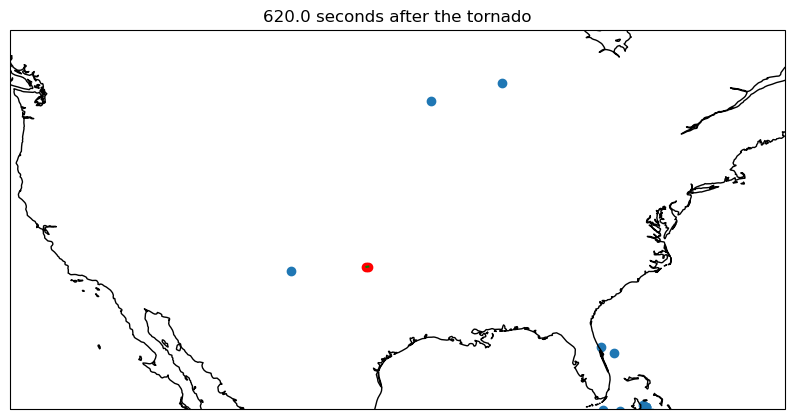

<Figure size 640x480 with 0 Axes>

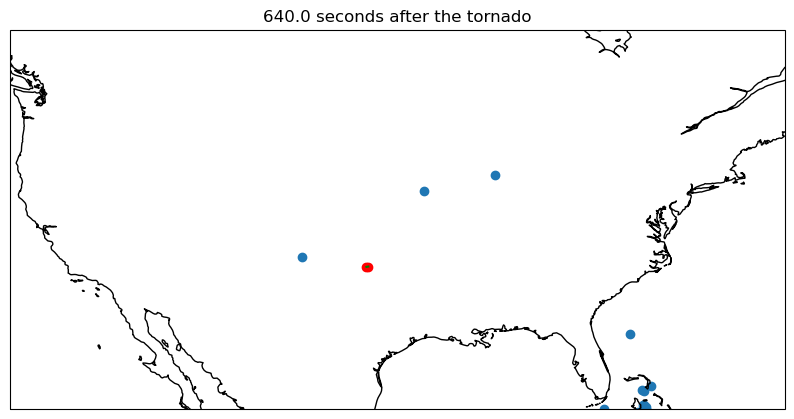

<Figure size 640x480 with 0 Axes>

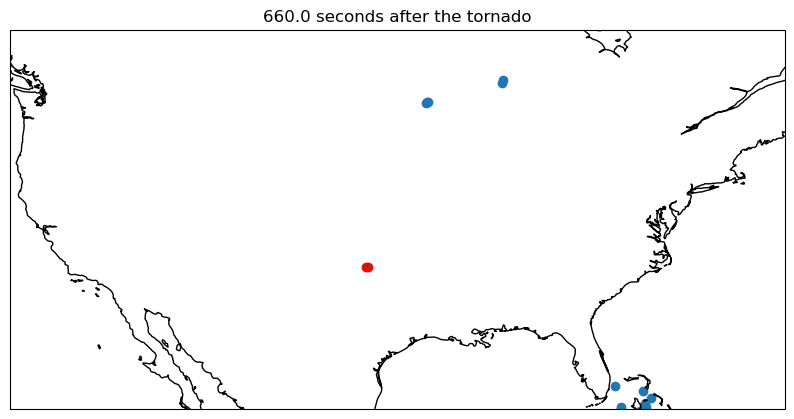

<Figure size 640x480 with 0 Axes>

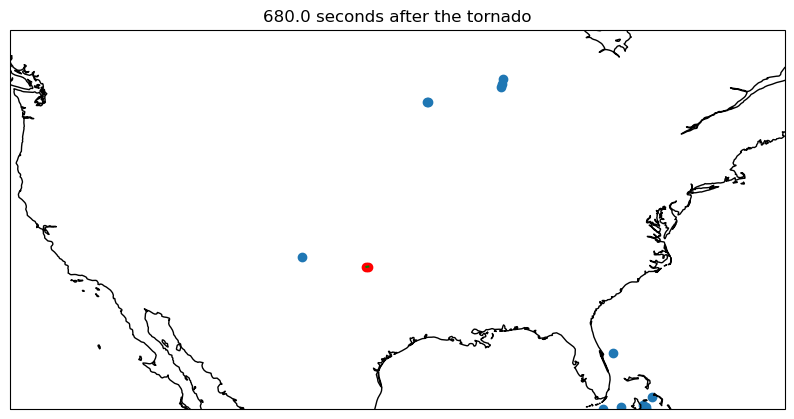

<Figure size 640x480 with 0 Axes>

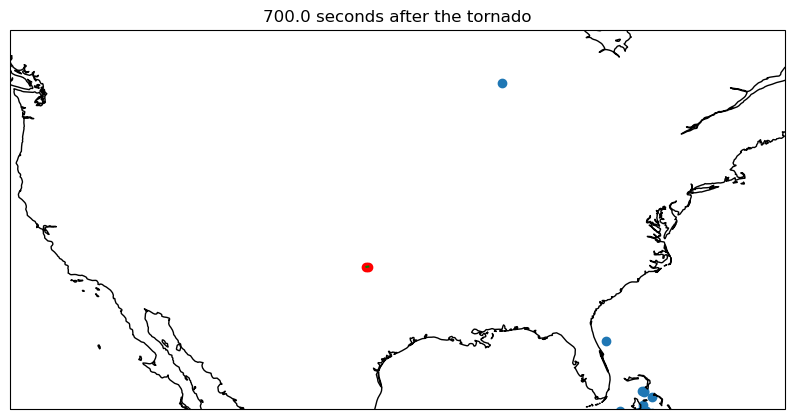

<Figure size 640x480 with 0 Axes>

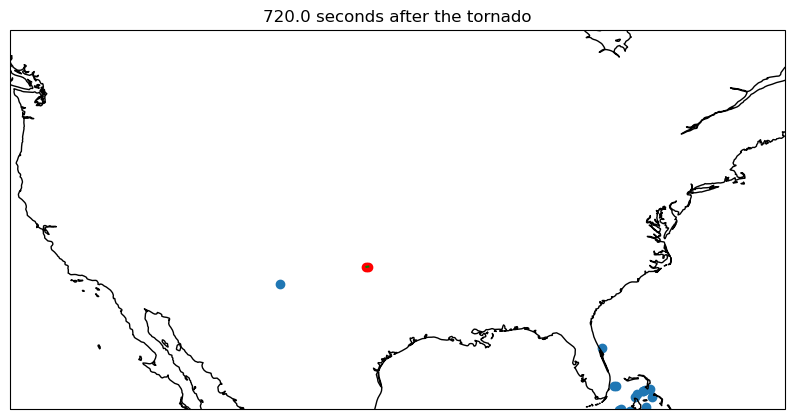

<Figure size 640x480 with 0 Axes>

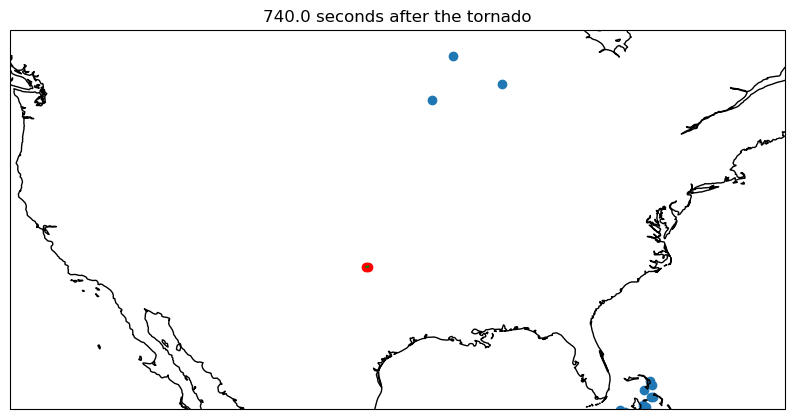

<Figure size 640x480 with 0 Axes>

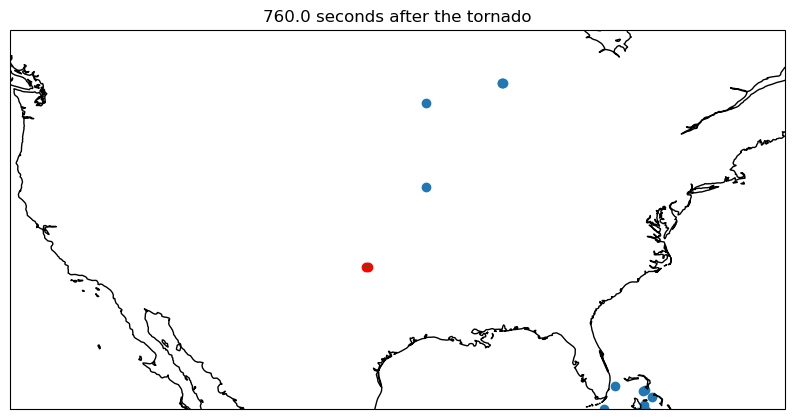

<Figure size 640x480 with 0 Axes>

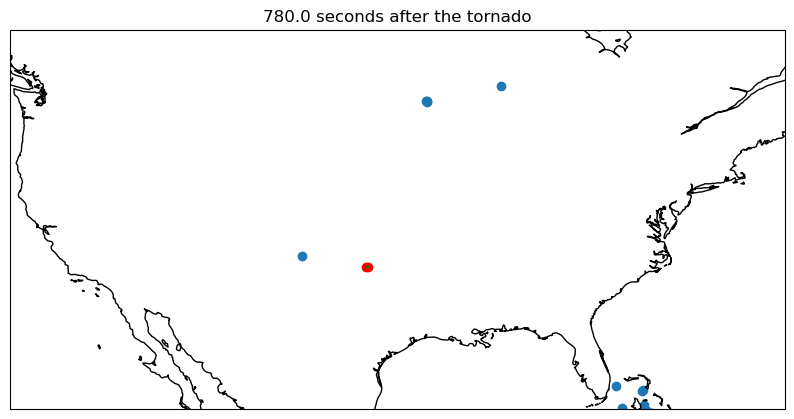

<Figure size 640x480 with 0 Axes>

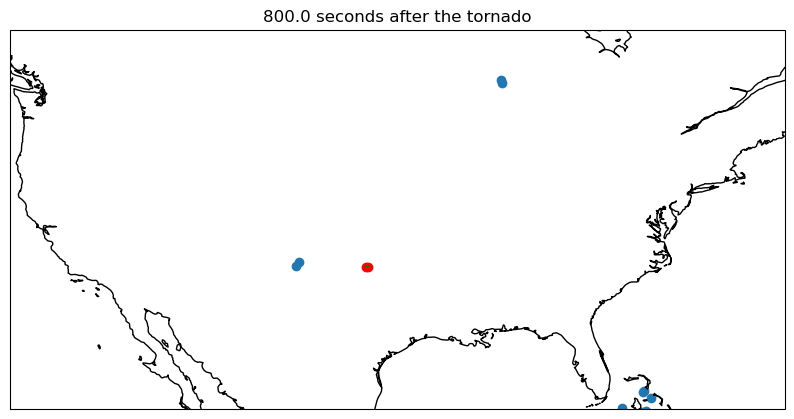

<Figure size 640x480 with 0 Axes>

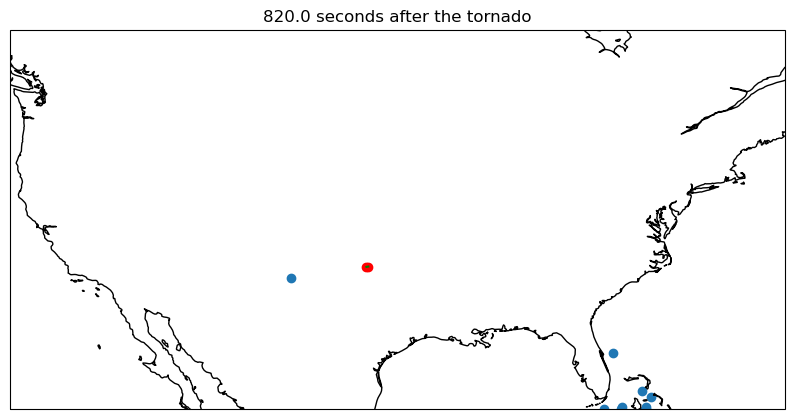

<Figure size 640x480 with 0 Axes>

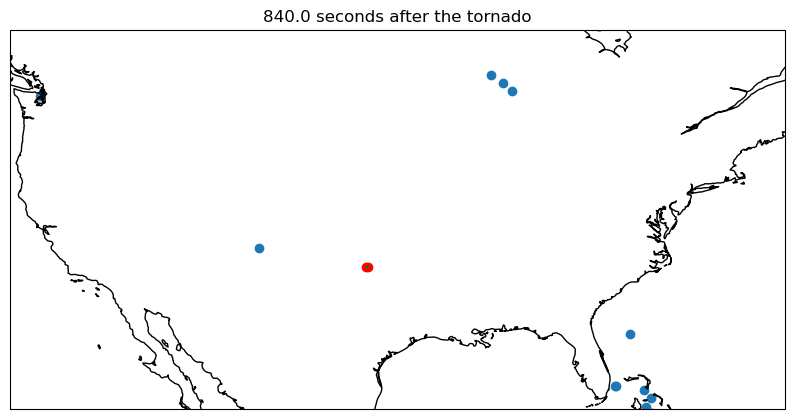

<Figure size 640x480 with 0 Axes>

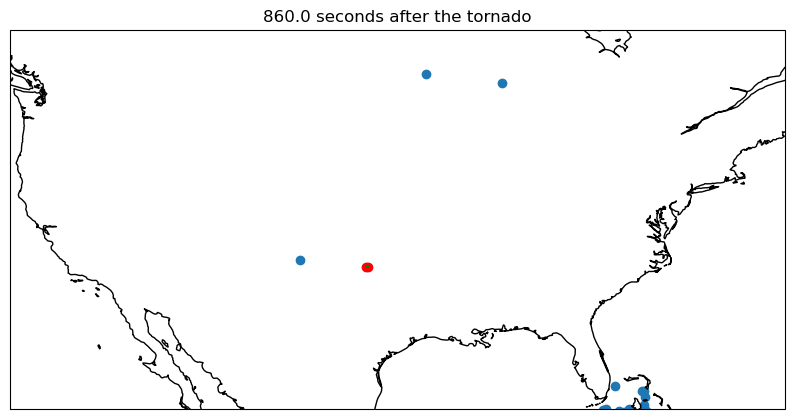

<Figure size 640x480 with 0 Axes>

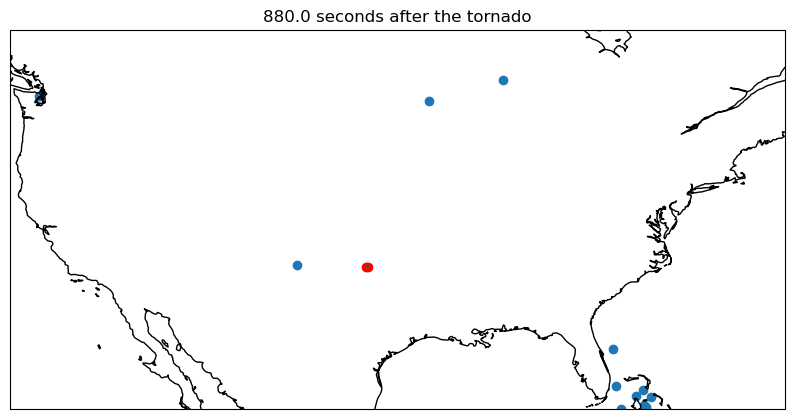

<Figure size 640x480 with 0 Axes>

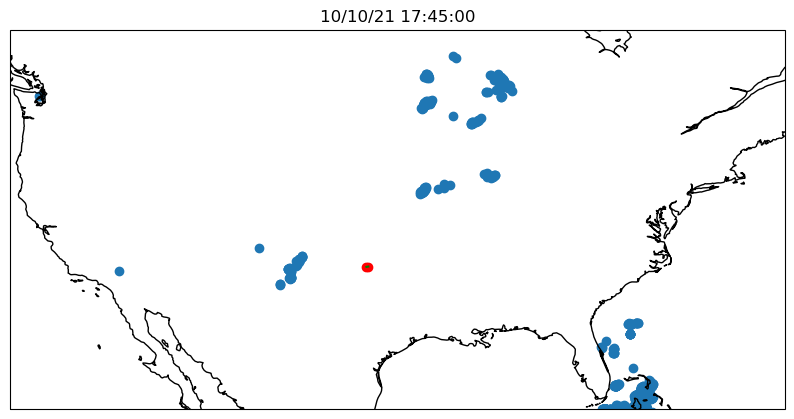

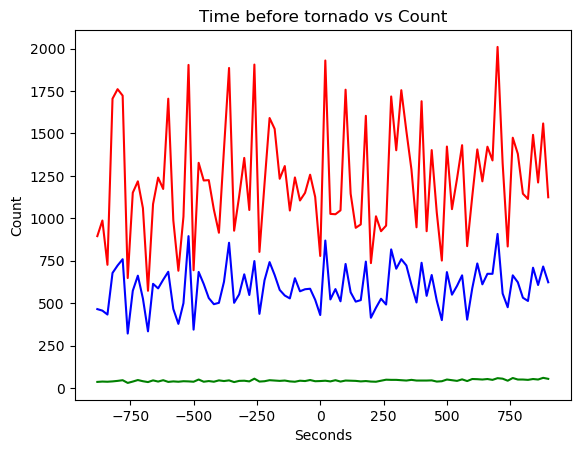

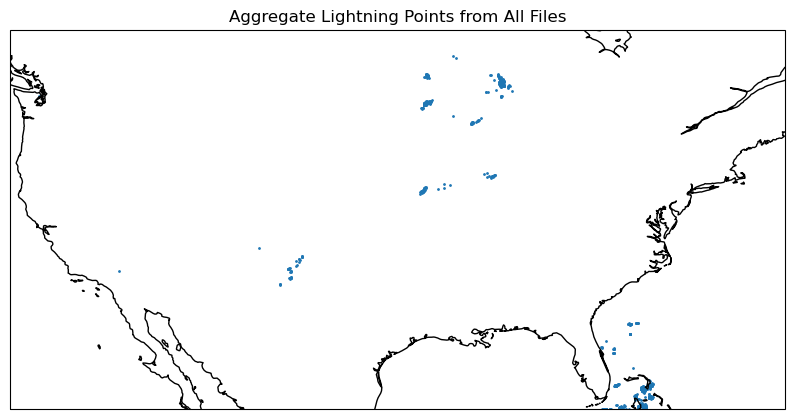

In [11]:
# Latitude and longitude limits for the United States (approximate)
lat_min, lat_max = 24.396308, 49.384358
lon_min, lon_max = -125.000000, -66.934570

all_latitudes = []
all_longitudes = []
event_num = []
group_num = []
flash_num = []

timestamps = []

for file_path in matched_files:
    nc_file = Dataset(file_path, "r")
    parts = nc_file.dataset_name.split("_")
    file_start_timestamp_str = parts[3][1:14]

    file_start_timestamp = datetime.strptime(file_start_timestamp_str, "%Y%j%H%M%S")
    tornado_start_timestamp = datetime.strptime(str(timestamp), "%Y-%m-%d %H:%M:%S")

    # Calculating the time difference
    time_dif = tornado_start_timestamp - file_start_timestamp
    time_dif_seconds = time_dif.total_seconds()

    timestamps.append(time_dif_seconds)

for file_path in matched_files:
    nc_file = Dataset(file_path, "r")
    longitudes = nc_file.variables['flash_lon'][:]
    latitudes = nc_file.variables['flash_lat'][:]
    event_count = nc_file.variables['event_count'][:] # this is a guess, adjust as needed
    group_count = nc_file.variables['group_count'][:]
    flash_count = nc_file.variables['flash_count'][:]

    # Append this file's latitudes and longitudes to the master list
    all_latitudes.extend(latitudes)
    all_longitudes.extend(longitudes)
    event_num.append(np.sum(event_count))
    group_num.append(np.sum(group_count))
    flash_num.append(np.sum(flash_count))

    parts = nc_file.dataset_name.split("_")
    file_start_timestamp_str = parts[3][1:14]

    file_start_timestamp = datetime.strptime(file_start_timestamp_str, "%Y%j%H%M%S")
    tornado_start_timestamp = datetime.strptime(str(timestamp), "%Y-%m-%d %H:%M:%S")

    # Calculating the time difference
    time_dif = tornado_start_timestamp - file_start_timestamp
    time_dif_seconds = time_dif.total_seconds()

    plt.figure(figsize=(10, 5))  # Define the figure size
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])  # Set extent to United States
    ax.coastlines()
    ax.scatter(longitudes, latitudes, transform=ccrs.PlateCarree())

    ax.scatter(values[1], values[0], color="red", transform=ccrs.PlateCarree())
    ax.scatter(values[3], values[2], color="red", transform=ccrs.PlateCarree())

    ax.plot([values[1], values[3]], [values[0], values[2]], color='green', transform=ccrs.PlateCarree())

    if time_dif_seconds > 0:
        plt.title('{} seconds before the tornado'.format(time_dif_seconds))
    
    elif time_dif_seconds == 0:
        plt.title('Tornado happening!')
    
    else:
        plt.title('{} seconds after the tornado'.format(abs(time_dif_seconds)))

    pdf_pages.savefig()
    plt.show()  # Show the plot
    plt.clf()  # Clear the plot for the next iteration

plt.figure(figsize=(10, 5))  # Define a new figure size
ax = plt.axes(projection=ccrs.PlateCarree())  # Create a new axis
ax.set_extent([lon_min, lon_max, lat_min, lat_max])  # Set extent to United States
ax.coastlines()

ax.scatter(all_longitudes, all_latitudes, transform=ccrs.PlateCarree())

# Presumably, these are some specific points you want to highlight
ax.scatter(values[1], values[0], color="red", transform=ccrs.PlateCarree())
ax.scatter(values[3], values[2], color="red", transform=ccrs.PlateCarree())
ax.plot([values[1], values[3]], [values[0], values[2]], color='green', transform=ccrs.PlateCarree())
plt.title("10/10/21 17:45:00")
plt.show()  # Show the combined plot

plt.plot(timestamps, group_num, label="Group Count", color='blue')
plt.plot(timestamps, event_num, label="Event Count", color="red")
plt.plot(timestamps, flash_num, label="Flash Count", color="green")
plt.title('Time before tornado vs Count')
plt.xlabel('Seconds')
plt.ylabel('Count')

# Display the plot
plt.show()

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.coastlines()
ax.scatter(all_longitudes, all_latitudes, transform=ccrs.PlateCarree(), s=1)  # Plot all points

plt.title("Aggregate Lightning Points from All Files")
pdf_pages.savefig()  # Save this plot as a new page in the PDF
plt.show()

pdf_pages.close()

In [1]:
def haversine(coord1, coord2):
    R = 6371.0 # Radius of the Earth in kilometers

    lat1, lon1 = map(radians, coord1)
    lat2, lon2 = map(radians, coord2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def extract_lightning_data(reference_point, files):
    distances = []
    flash_energies = []
    flash_areas = []
    group_areas = []
    flash_counts = []
    timestamps = []


    for file in files:
        ds = xr.open_dataset(file)

        lats = ds['flash_lat'].values
        lons = ds['flash_lon'].values
        energies = ds['flash_energy'].values
        areas = ds['flash_area'].values  # Assuming the variable is named 'flash_area's
        g_areas = ds['group_area'].values

        for lat, lon, energy, area, g_area in zip(lats, lons, energies, areas, g_areas):
            distance = haversine(reference_point, (lat, lon))
            distances.append(distance)
            flash_energies.append(energy)
            flash_areas.append(area)
            group_areas.append(g_area)
            
        
        timestamps.append()


    return distances, flash_energies, flash_areas, group_areas